In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer #Z-score variables, Polynomial
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation

%matplotlib inline

# Data Loading

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Flat prices_2.csv")
df.head()

,month,town,flat_type,flat_type_ordinal,block,block_ordinal,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,21-Feb,ANG MO KIO,3 ROOM,3.0,308B,308,ANG MO KIO AVE 1,13 TO 15,70.0,Model A,2012,90 years 08 months,509000.0
1,21-Feb,ANG MO KIO,3 ROOM,3.0,333,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,59 years,289500.0
2,21-Feb,ANG MO KIO,3 ROOM,3.0,339,339,ANG MO KIO AVE 1,01 TO 03,66.0,Improved,1981,59 years 07 months,282000.0
3,21-Feb,ANG MO KIO,3 ROOM,3.0,330,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,59 years,280000.0
4,21-Feb,ANG MO KIO,3 ROOM,3.0,215,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,54 years 02 months,290000.0


# Preprocessing

In [ ]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [ ]:
# preprocessing for the 'storey_range' columns
# 'storey_range' columns were separated into min and max values of int type.
df[['storey_min', 'storey_max']] = df['storey_range'].str.split(' TO ', expand=True)
df['storey_min'] = df['storey_min'].astype(int)
df['storey_max'] = df['storey_max'].astype(int)

# preprocessing for the 'remaining_lease' columns
# We'll use only the year value.
df['remaining_lease_year'] = df['remaining_lease'].str[:2]
df['remaining_lease_year'] = df['remaining_lease_year'].astype(int)

In [ ]:
df.head()

,level_0,index,month,town,flat_type,flat_type_ordinal,block,block_ordinal,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,storey_min,storey_max,remaining_lease_year
0,0,0,21-Feb,ANG MO KIO,3 ROOM,3.0,308B,308,ANG MO KIO AVE 1,13 TO 15,70.0,Model A,2012,90 years 08 months,509000.0,13,15,90
1,1,1,21-Feb,ANG MO KIO,3 ROOM,3.0,333,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,59 years,289500.0,1,3,59
2,2,2,21-Feb,ANG MO KIO,3 ROOM,3.0,339,339,ANG MO KIO AVE 1,01 TO 03,66.0,Improved,1981,59 years 07 months,282000.0,1,3,59
3,3,3,21-Feb,ANG MO KIO,3 ROOM,3.0,330,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,59 years,280000.0,1,3,59
4,4,4,21-Feb,ANG MO KIO,3 ROOM,3.0,215,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,54 years 02 months,290000.0,4,6,54


# Q1. Can we identify distinct clusters of housing based on the variables in the data set?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Flat prices_2.csv")
df.dropna(inplace = True)
df.reset_index(inplace = True)

# preprocessing for the 'storey_range' columns
# 'storey_range' columns were separated into min and max values of int type.
df[['storey_min', 'storey_max']] = df['storey_range'].str.split(' TO ', expand=True)
df['storey_min'] = df['storey_min'].astype(int)
df['storey_max'] = df['storey_max'].astype(int)


# preprocessing for the 'remaining_lease' columns
# We'll use only the year value.
df['remaining_lease_year'] = df['remaining_lease'].str[:2]
df['remaining_lease_year'] = df['remaining_lease_year'].astype(int)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


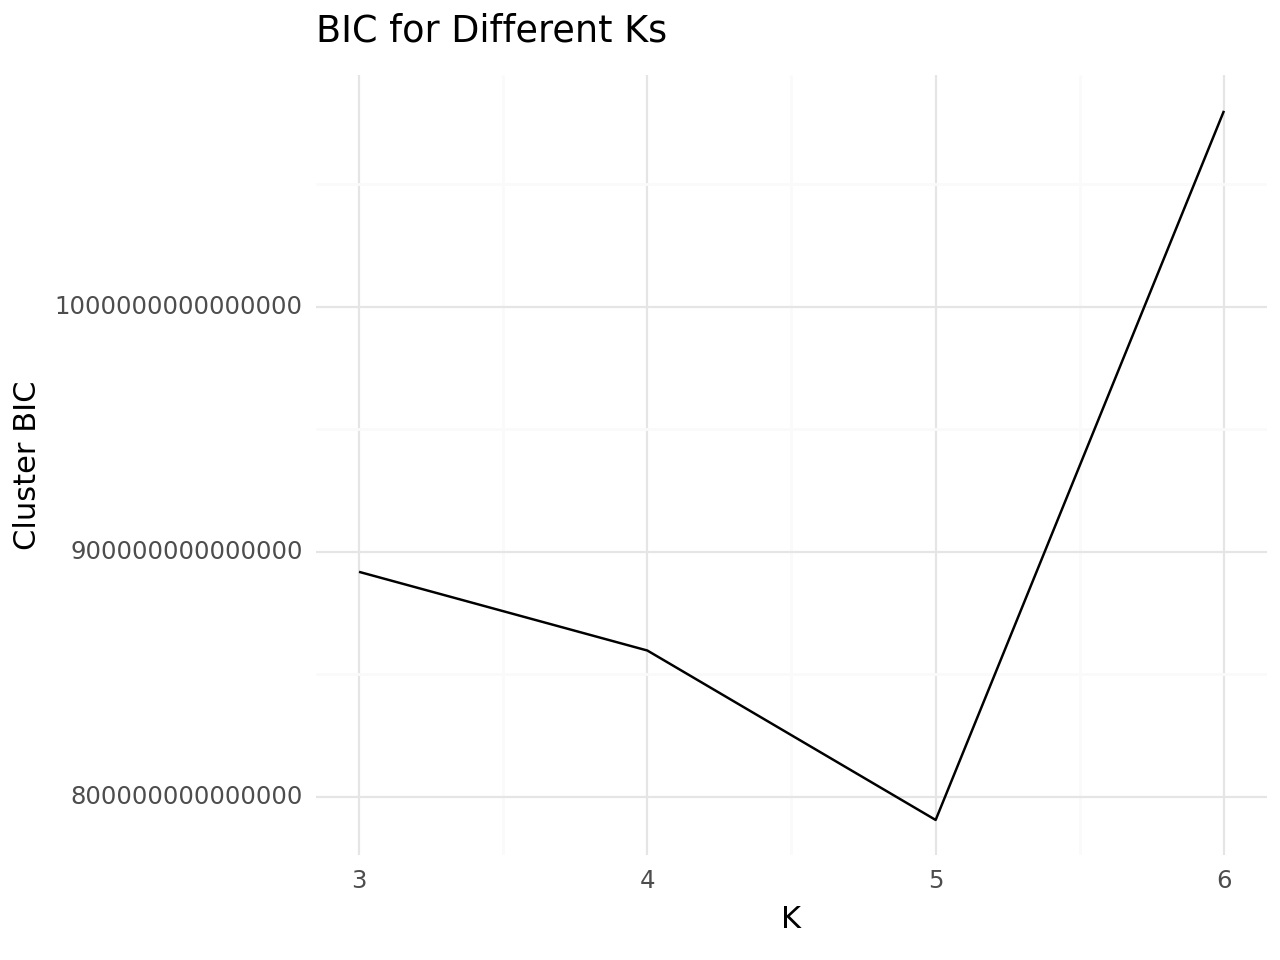

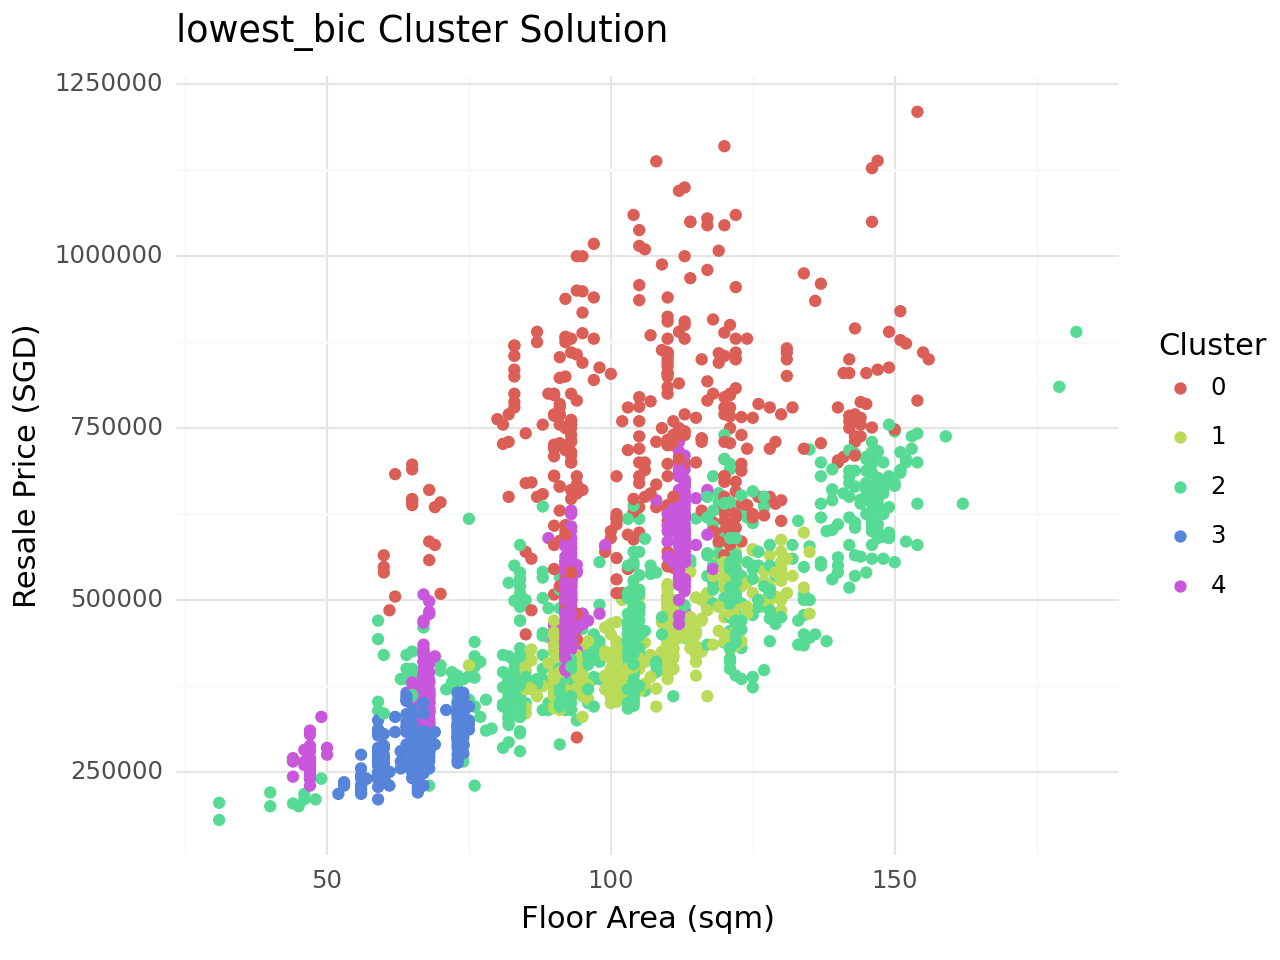


         floor_area_sqm   resale_price  remaining_lease_year
cluster                                                     
0            108.404959  748285.291680             81.223140
1            107.182825  440647.440443             78.481994
2            107.759690  475820.541085             62.700775
3             66.378671  294312.167832             57.265734
4             91.019685  480849.488189             93.297244


In [ ]:
random_state_num = random.randint(1, 100)
feats = ["floor_area_sqm","resale_price","remaining_lease_year"]

X = df[feats]

z = make_column_transformer((StandardScaler(), feats),
                            remainder = "passthrough")

metrics = {"BIC": [], "k": []}

for i in range(3,7):
    gmm = GaussianMixture(i,random_state = random_state_num)
    pipe = Pipeline([
        ("pre", z),
        ("gmm", gmm)
    ])

    labels = pipe.fit_predict(X[feats])
    bic_val = pipe.named_steps["gmm"].bic(X[feats])

    metrics["BIC"].append(bic_val)
    metrics["k"].append(i)


decide_k = pd.DataFrame(metrics)

lowest_bic_k = decide_k['k'][decide_k['BIC'].idxmin()]
lowest_bic = decide_k['BIC'].min()

print(ggplot(decide_k, aes(x = "k", y = "BIC")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Cluster BIC",
         title = "BIC for Different Ks"))

gmm_best = GaussianMixture(lowest_bic_k,random_state=random_state_num)
pipe_best = Pipeline([("pre",z),("gmm",gmm_best)])

labels_best = pipe_best.fit_predict(X[feats])
X["cluster"] = labels_best

print(ggplot(X, aes(x = "floor_area_sqm", y = "resale_price", color ="factor(cluster)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster") +
labs(x = "Floor Area (sqm)",
y = "Resale Price (SGD)",
title = "lowest_bic Cluster Solution"))


cluster_summary = X.groupby('cluster').mean()

print(cluster_summary)


# Q2. If we were to use PCA, how many components would be need to include in our model? Would running a logistic regression model to calculate the resale price of the flat be more accurate if we conducted dimensionality reduction on the variables using PCA, or simply use the variables as we have it in the data?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Flat prices_2.csv")
df2.dropna(inplace = True)
df2.reset_index(inplace = True)

# preprocessing for the 'storey_range' columns
# 'storey_range' columns were separated into min and max values of int type.
df2[['storey_min', 'storey_max']] = df2['storey_range'].str.split(' TO ', expand=True)
df2['storey_min'] = df2['storey_min'].astype(int)
df2['storey_max'] = df2['storey_max'].astype(int)


# preprocessing for the 'remaining_lease' columns
# We'll use only the year value.
df2['remaining_lease_year'] = df2['remaining_lease'].str[:2]
df2['remaining_lease_year'] = df2['remaining_lease_year'].astype(int)

Train MSE :  11075654146.211082
Train MAE :  78991.59006431577
Train MAPE:  11075654146.211082
Train R2  :  0.5903790359965881
Test MSE  :  9865347267.763767
Test MAE  :  75221.1995414671
Test MAPE :  9865347267.763767
Test R2  :  0.6475361914228008


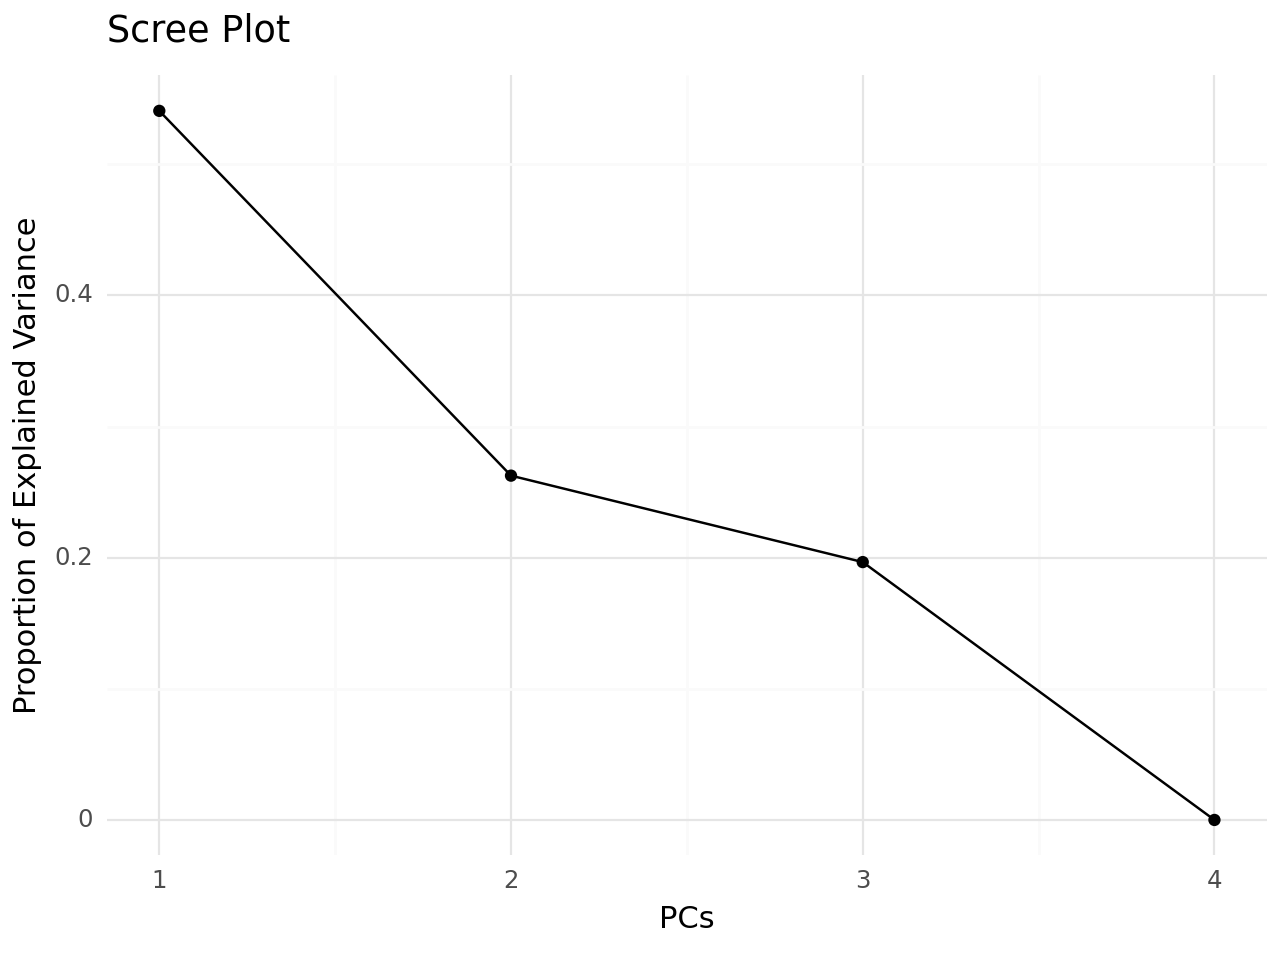

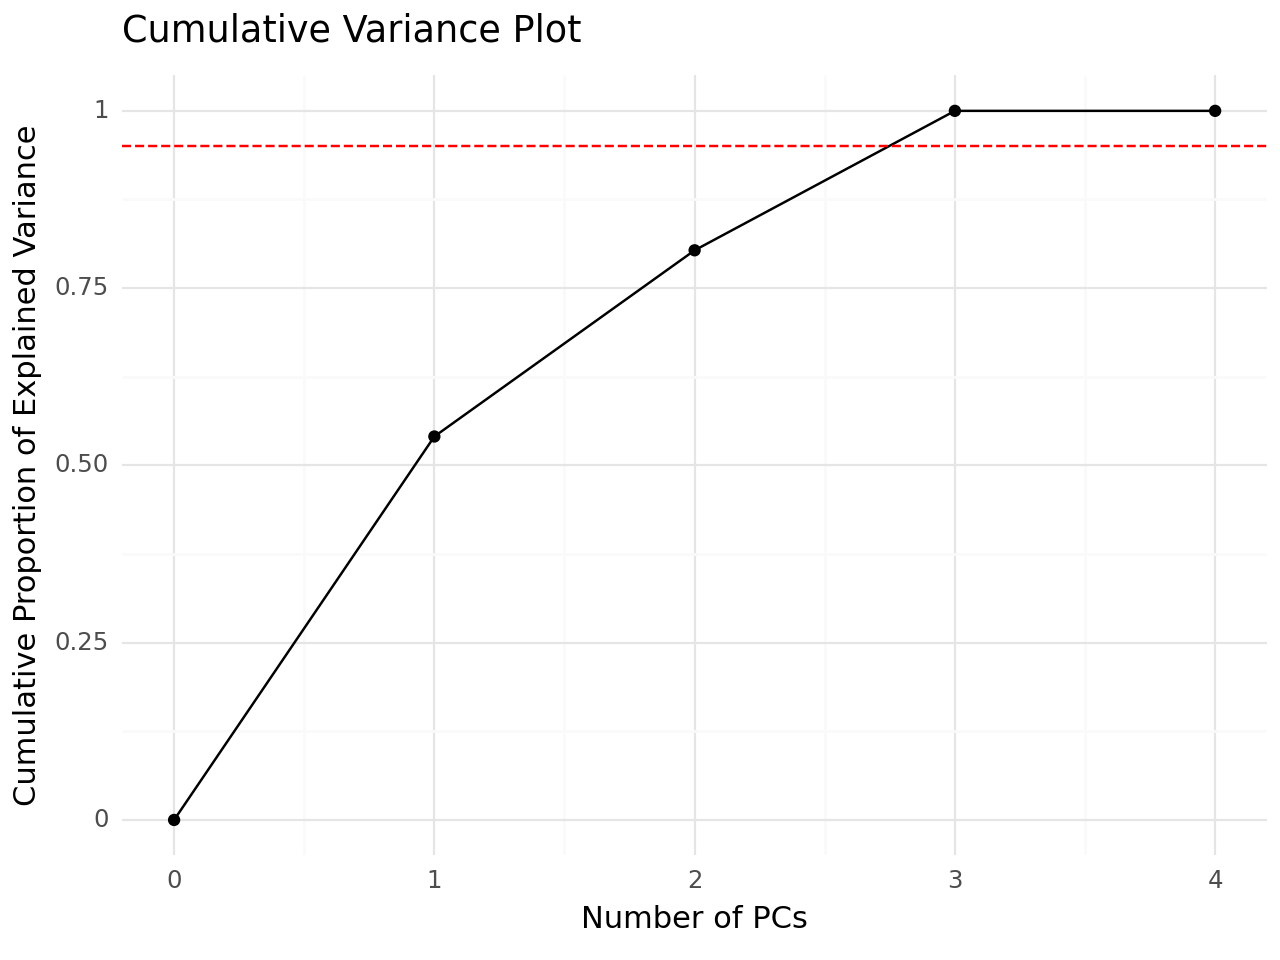


Train MSE :  10821470310.303783
Train MAE :  77929.87079338473
Train MAPE:  10821470310.303783
Train R2  :  0.6033459925912814
Test MSE  :  10880925094.847256
Test MAE  :  79463.2353700356
Test MAPE :  10880925094.847256
Test R2  :  0.5982945091831706


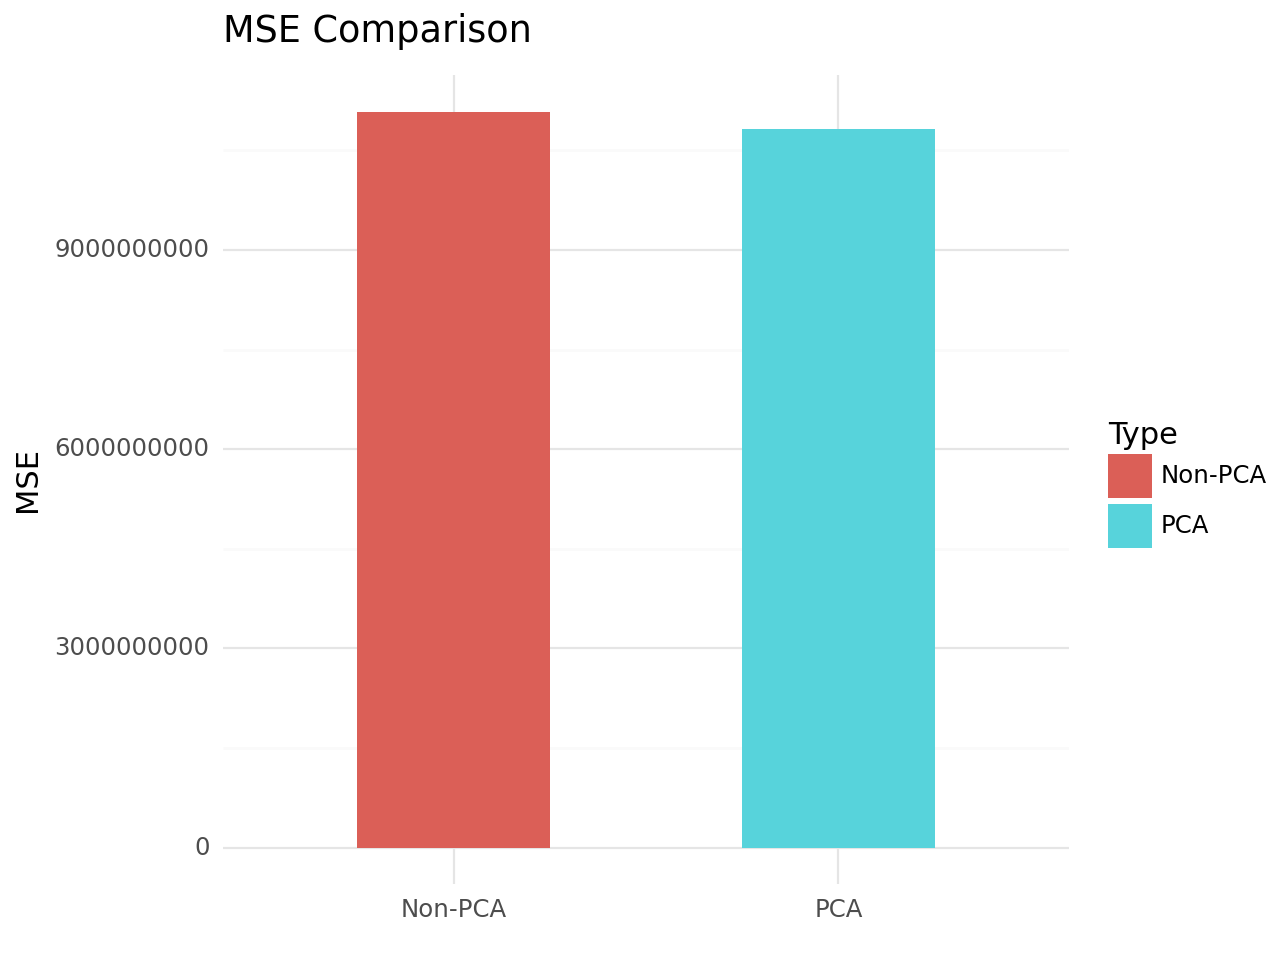

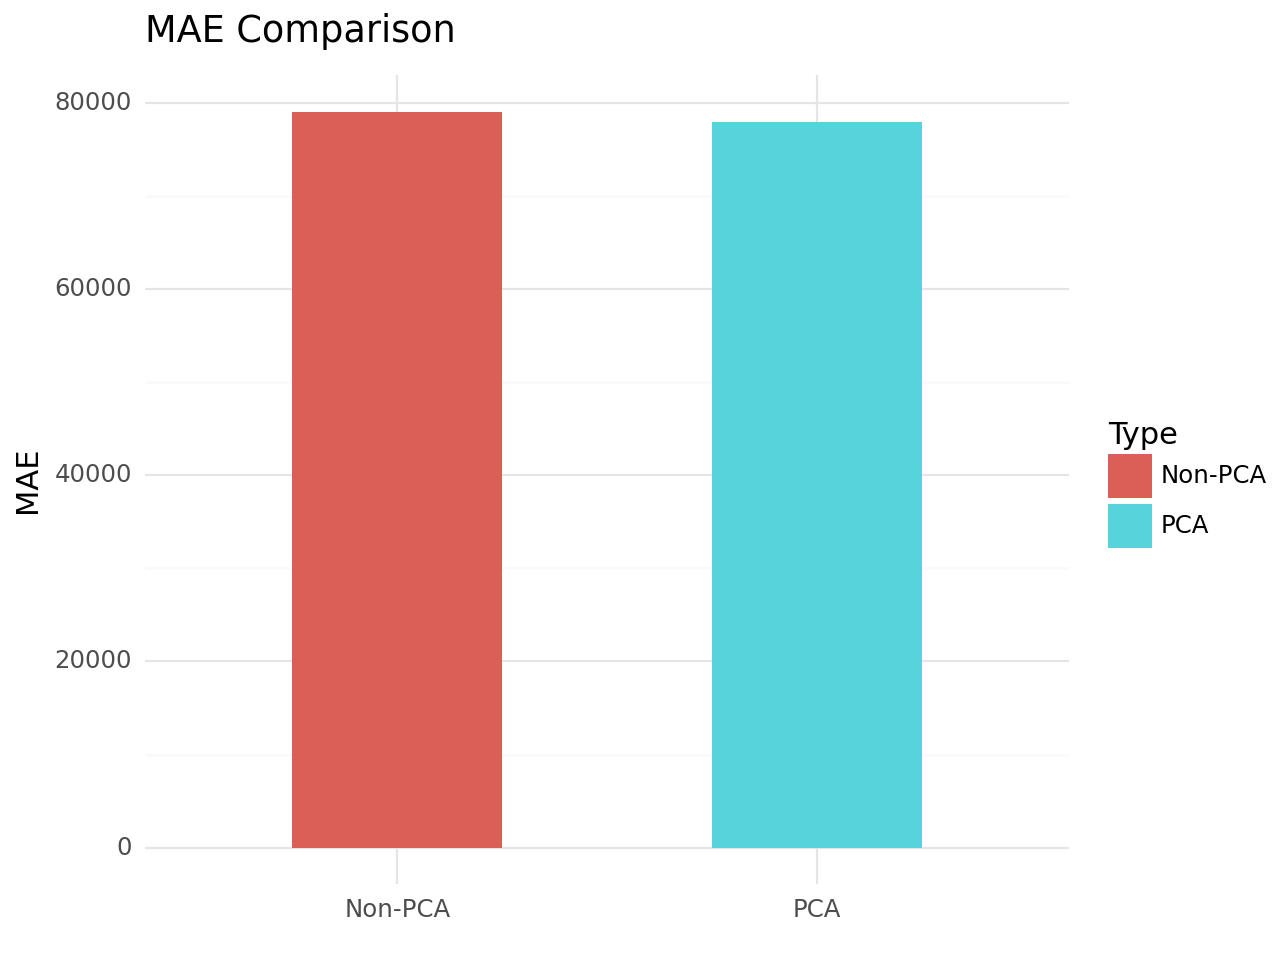

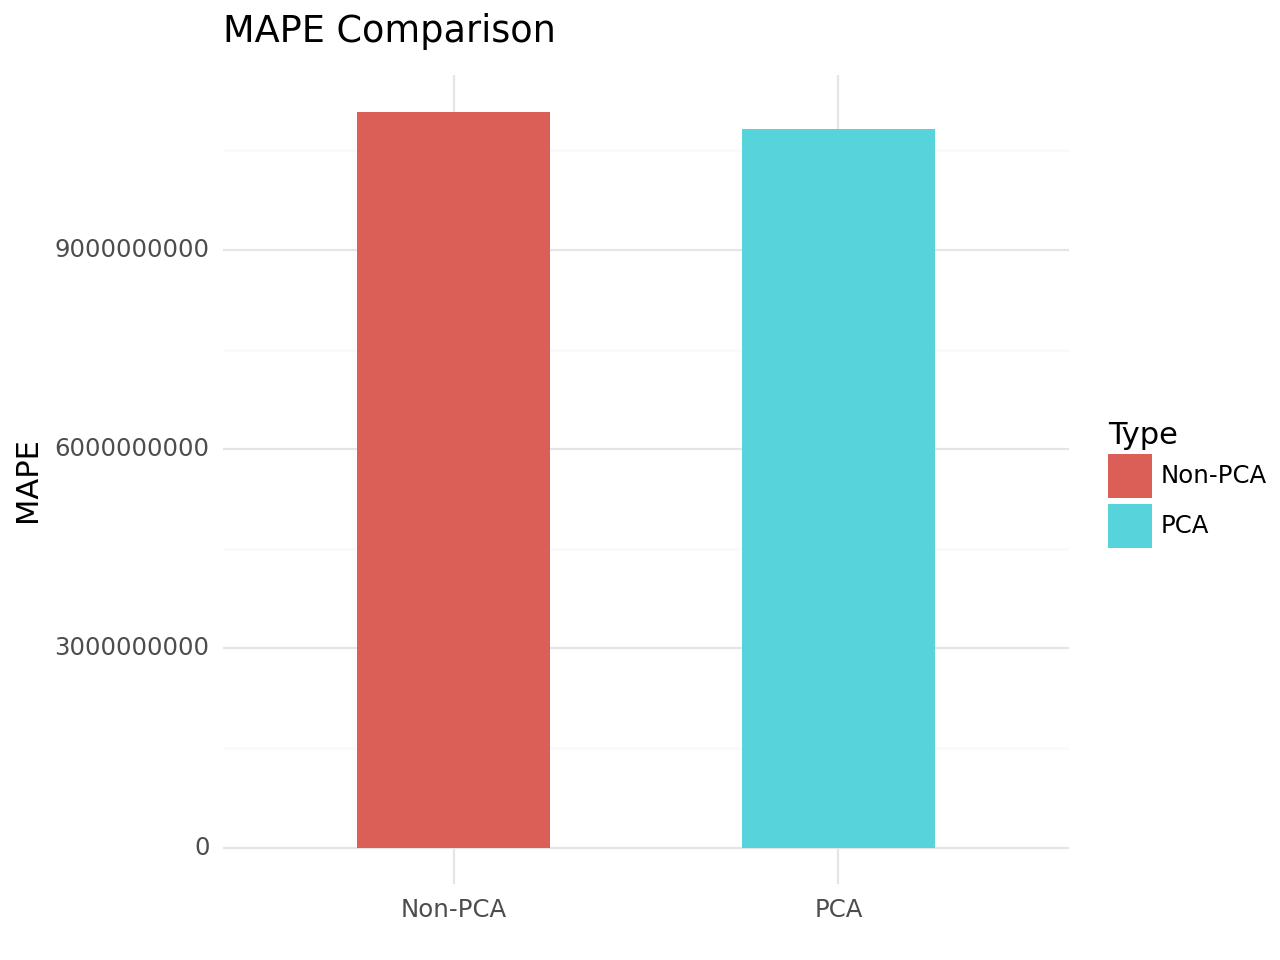

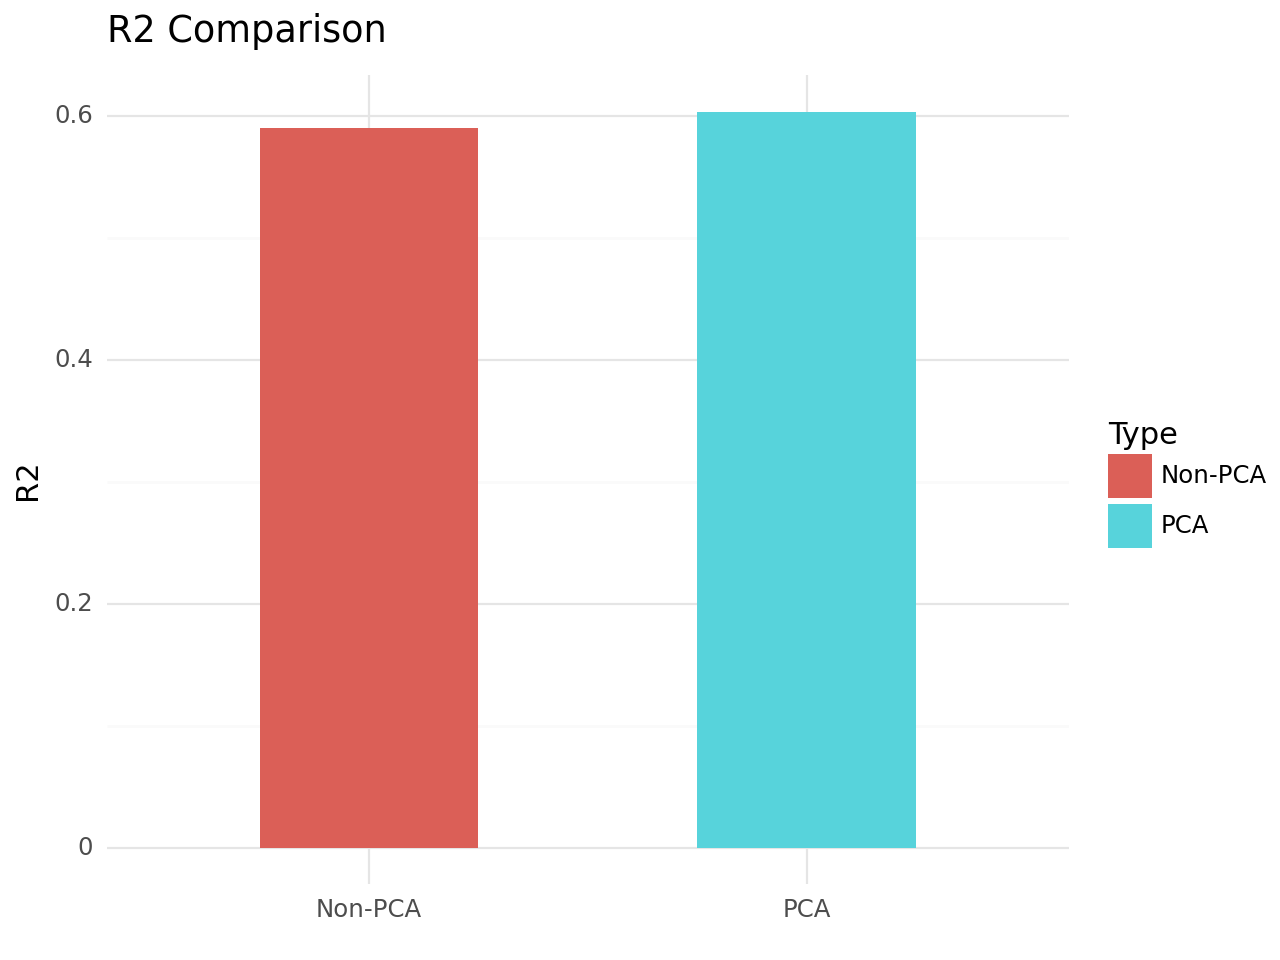

In [ ]:
feats2 = ["storey_min","storey_max","remaining_lease_year","floor_area_sqm"]

X = df2[feats2]
y = df2["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

preprocess = make_column_transformer((StandardScaler(), feats2),remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", preprocess),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)


y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

trainMSE = mean_squared_error(y_train,y_pred_train)
trainMAE = mean_absolute_error(y_train,y_pred_train)
trainMAPE = mean_squared_error(y_train,y_pred_train)
trainR2 = r2_score(y_train,y_pred_train)

testMSE = mean_squared_error(y_test,y_pred_test)
testMAE =mean_absolute_error(y_test,y_pred_test)
testMAPE = mean_squared_error(y_test,y_pred_test)
testR2 = r2_score(y_test,y_pred_test)

df3 = pd.read_csv("/content/drive/MyDrive/Flat prices_2.csv")
df3.dropna(inplace = True)
df3.reset_index(inplace = True)

# preprocessing for the 'storey_range' columns
# 'storey_range' columns were separated into min and max values of int type.
df3[['storey_min', 'storey_max']] = df3['storey_range'].str.split(' TO ', expand=True)
df3['storey_min'] = df3['storey_min'].astype(int)
df3['storey_max'] = df3['storey_max'].astype(int)


# preprocessing for the 'remaining_lease' columns
# We'll use only the year value.
df3['remaining_lease_year'] = df3['remaining_lease'].str[:2]
df3['remaining_lease_year'] = df3['remaining_lease_year'].astype(int)

feats3 = ["storey_min","storey_max","remaining_lease_year","floor_area_sqm"]
sub = df3[feats3]

X = df3[feats3]
y = df3["resale_price"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size= 0.2)

z = make_column_transformer((StandardScaler(), feats3),
                            remainder = "passthrough")

pca = PCA()

pipe_PCA = Pipeline([
    ("z", z),
    ("pca", pca)
])

pipe_PCA.fit(sub)

pcaDF = pd.DataFrame({"expl_var" :
                      pipe_PCA.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,5),
                      "cum_var":
                      pipe_PCA.named_steps["pca"].explained_variance_ratio_.cumsum()})

print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))


pcaDF0 = pd.concat([pcaDF, pd.DataFrame({"pc": [0], "cum_var": [0]})]) # add 0,0 for reference

print(ggplot(pcaDF0, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

# empty pipeline
z = make_column_transformer((StandardScaler(), feats3),
                            remainder = "passthrough")

pca = PCA(n_components = 3)

pipe_lr = Pipeline([
    ("z", z),
    ("pca", pca),
    ("model", LinearRegression())
])

# fit
pipe_lr.fit(X_train2,y_train2)

y_pred_train2 = pipe.predict(X_train2)
y_pred_test2 = pipe.predict(X_test2)


print("Train MSE : ", mean_squared_error(y_train2,y_pred_train2))
print("Train MAE : ", mean_absolute_error(y_train2,y_pred_train2))
print("Train MAPE: ", mean_squared_error(y_train2,y_pred_train2))
print("Train R2  : ", r2_score(y_train2,y_pred_train2))

print("Test MSE  : ", mean_squared_error(y_test2,y_pred_test2))
print("Test MAE  : ", mean_absolute_error(y_test2,y_pred_test2))
print("Test MAPE : ", mean_squared_error(y_test2,y_pred_test2))
print("Test R2  : ", r2_score(y_test2,y_pred_test2))

PCAtrainMSE = mean_squared_error(y_train2,y_pred_train2)
PCAtrainMAE = mean_absolute_error(y_train2,y_pred_train2)
PCAtrainMAPE = mean_squared_error(y_train2,y_pred_train2)
PCAtrainR2 = r2_score(y_train2,y_pred_train2)

PCAtestMSE = mean_squared_error(y_test2,y_pred_test2)
PCAtestMAE = mean_absolute_error(y_test2,y_pred_test2)
PCAtestMAPE = mean_squared_error(y_test2,y_pred_test2)
PCAtestR2 = r2_score(y_test2,y_pred_test2)

data = {
    'Metric': ['MSE', 'MAE', 'MAPE', 'R2']*2,
    'Value': [trainMSE, trainMAE, trainMAPE, trainR2, PCAtrainMSE, PCAtrainMAE, PCAtrainMAPE, PCAtrainR2],
    'Type': ['Non-PCA']*4 + ['PCA']*4
}
df = pd.DataFrame(data)

# Function to create individual plots
def plot_metric(metric_name):
    metric_df = df[df['Metric'] == metric_name]
    return (ggplot(metric_df, aes(x='Type', y='Value', fill='Type')) +
            geom_bar(stat='identity', position='dodge', width=0.5) +
            theme_minimal() +
            labs(title=f'{metric_name} Comparison', y=metric_name, x=''))

# Create and display plots for each metric
plot_mse = plot_metric('MSE')
plot_mae = plot_metric('MAE')
plot_mape = plot_metric('MAPE')
plot_r2 = plot_metric('R2')

print(plot_mse)
print(plot_mae)
print(plot_mape)
print(plot_r2)

# Q3.Can we use K-means clustering to segment the housing market? How does that affect the resale price of the units?

In [ ]:
predictors = ['flat_type_ordinal','floor_area_sqm','remaining_lease_year']

X = df[predictors]

z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

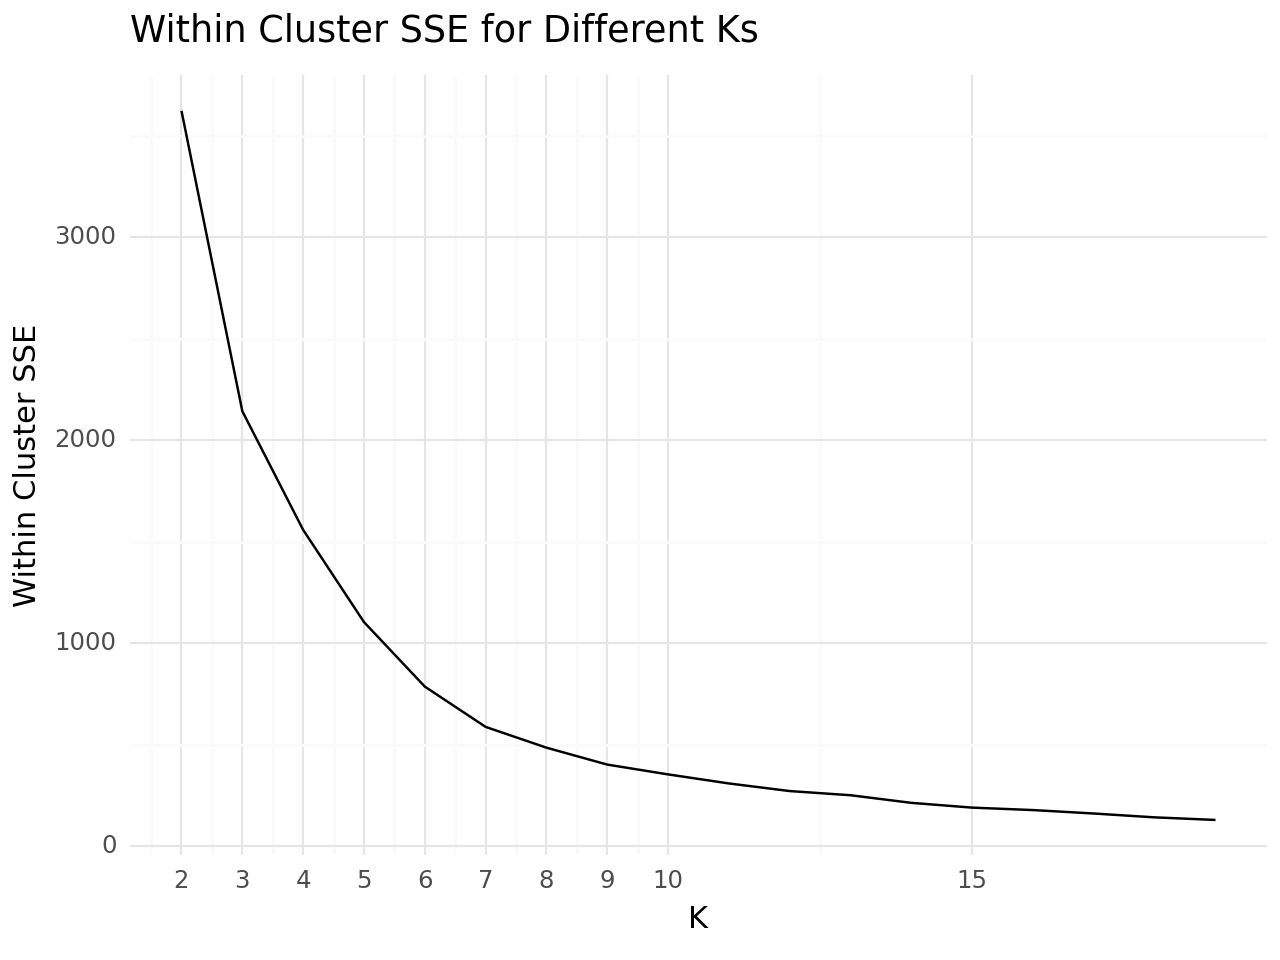

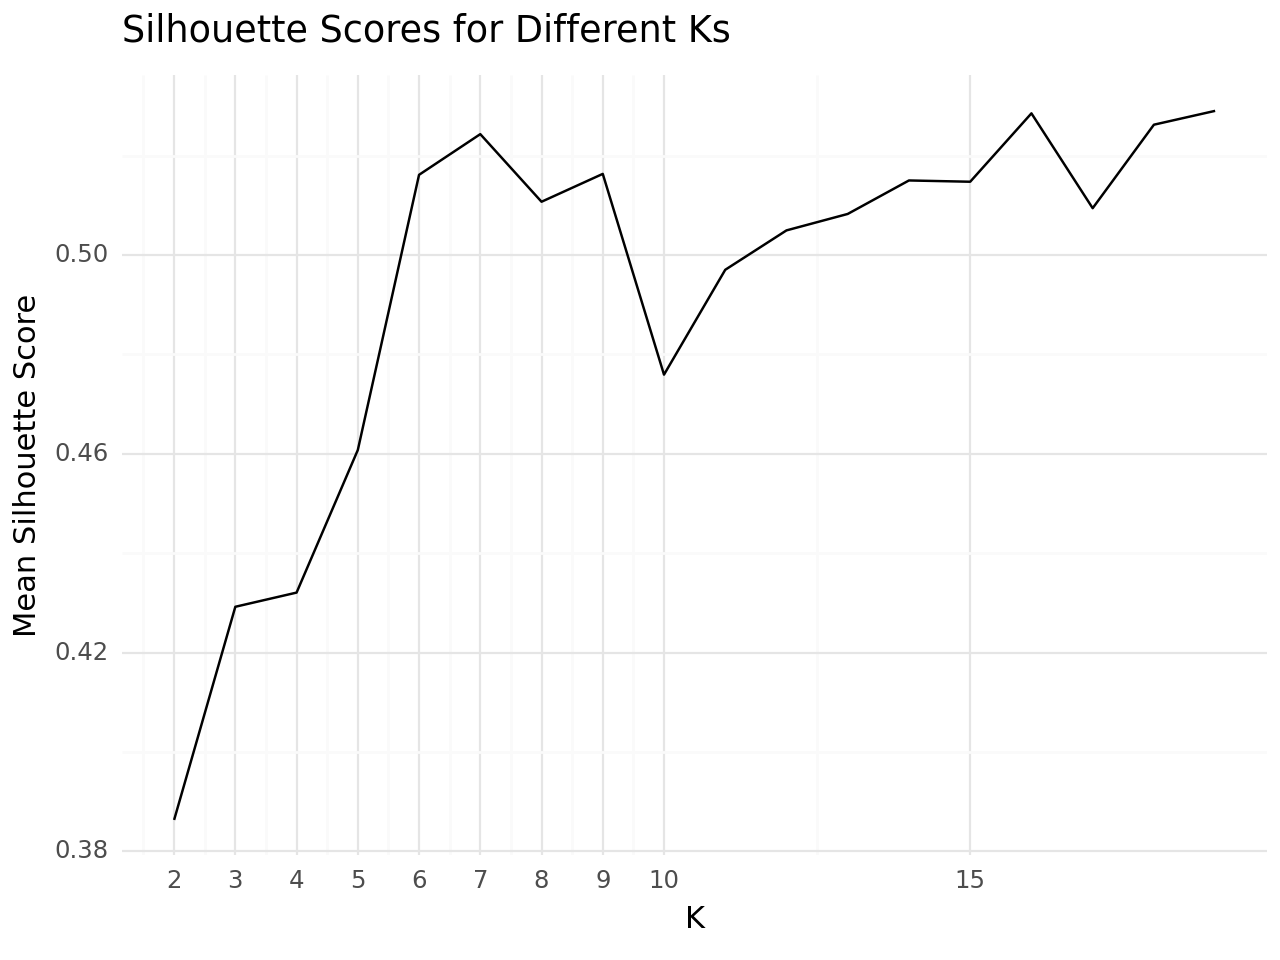

In [ ]:
metrics = {"SSE": [], "sil": [], "k": []}

for i in range(2,20):
    km = KMeans(i)
    pipe = Pipeline([
        ("pre", z),
        ("km", km)
    ])

    labels = pipe.fit_predict(X)
    sil = silhouette_score(X, labels)
    sse = pipe.named_steps["km"].inertia_

    metrics["SSE"].append(sse)
    metrics["sil"].append(sil)
    metrics["k"].append(i)

result_df = pd.DataFrame(metrics)

print(ggplot(result_df, aes(x = "k", y = "SSE")) +
  geom_line() + theme_minimal() +scale_x_continuous(breaks = [1,2,3,4,5,6,7,8,9,10,15])+
    labs(x = "K", y = "Within Cluster SSE",
         title = "Within Cluster SSE for Different Ks"))

print(ggplot(result_df, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +scale_x_continuous(breaks = [1,2,3,4,5,6,7,8,9,10,15])+
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

set k=7

In [ ]:
km = KMeans(n_clusters = 7)
pipe = Pipeline([("z", z), ("clust", km)])

labels = pipe.fit_predict(X)

df["clusters"] = labels

print(silhouette_score(X, pipe.predict(X)))

0.5243279594242994


### clustering result plot

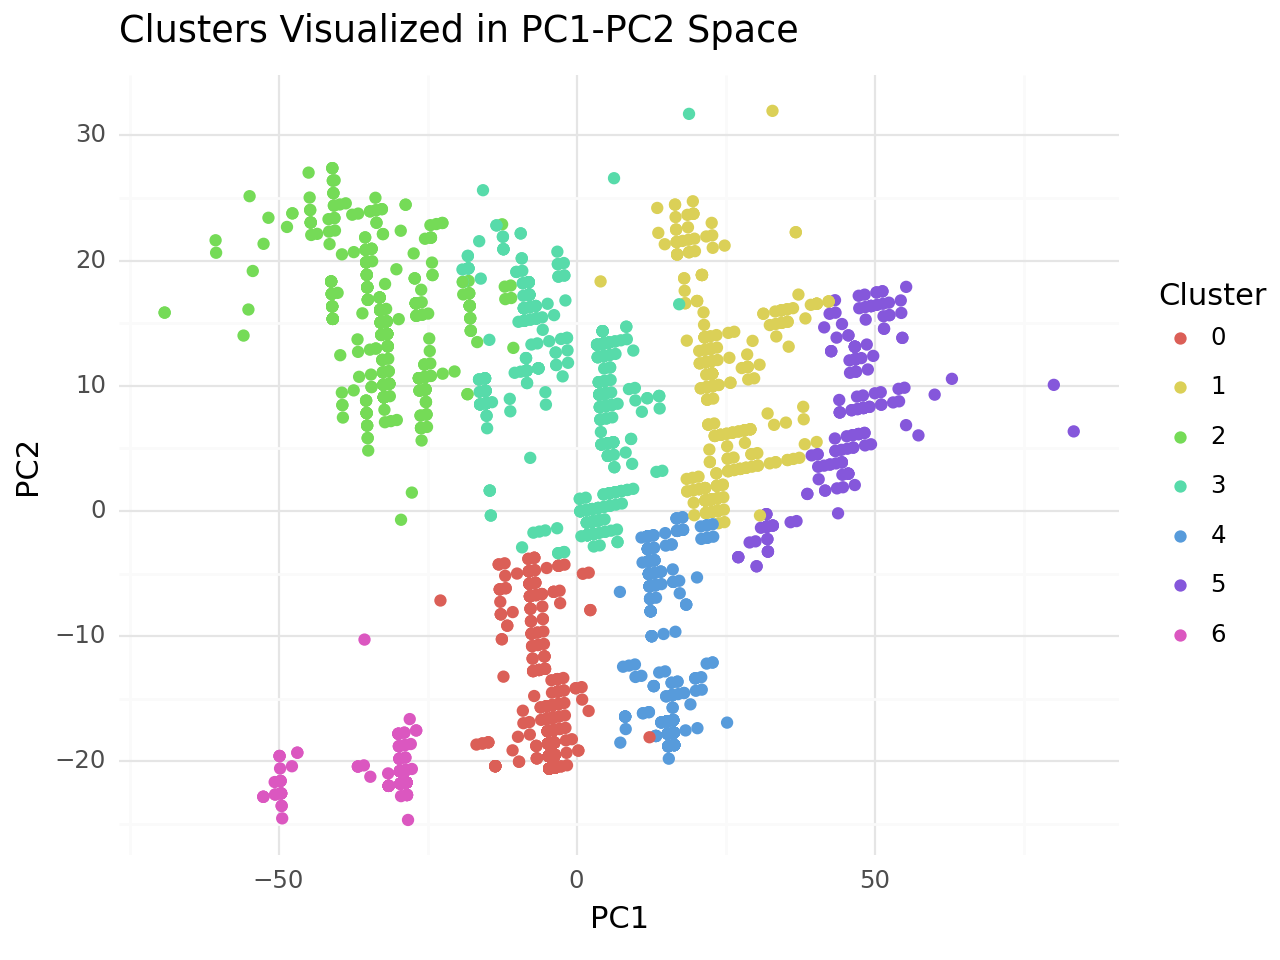

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pcs=pca.fit_transform(X)

pca_df=pd.DataFrame({'PC1': pcs[:, 0], 'PC2': pcs[:, 1], 'cluster': labels})

print(ggplot(pca_df, aes(x='PC1', y='PC2', color='factor(cluster)')) +
               geom_point() +
               labs(x='PC1', y='PC2', color='Cluster') +
               theme_minimal() +
               ggtitle('Clusters Visualized in PC1-PC2 Space'))

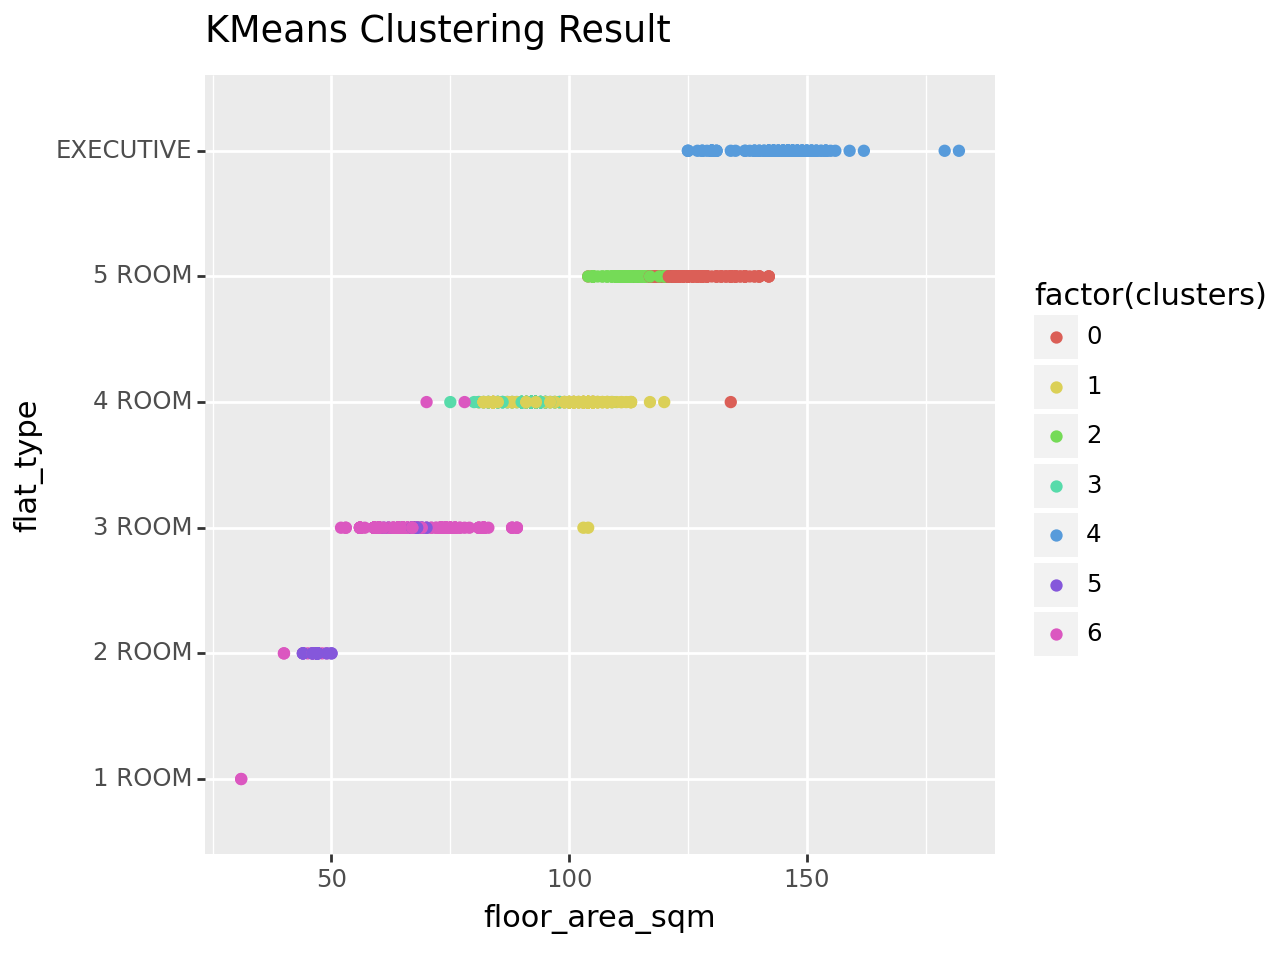

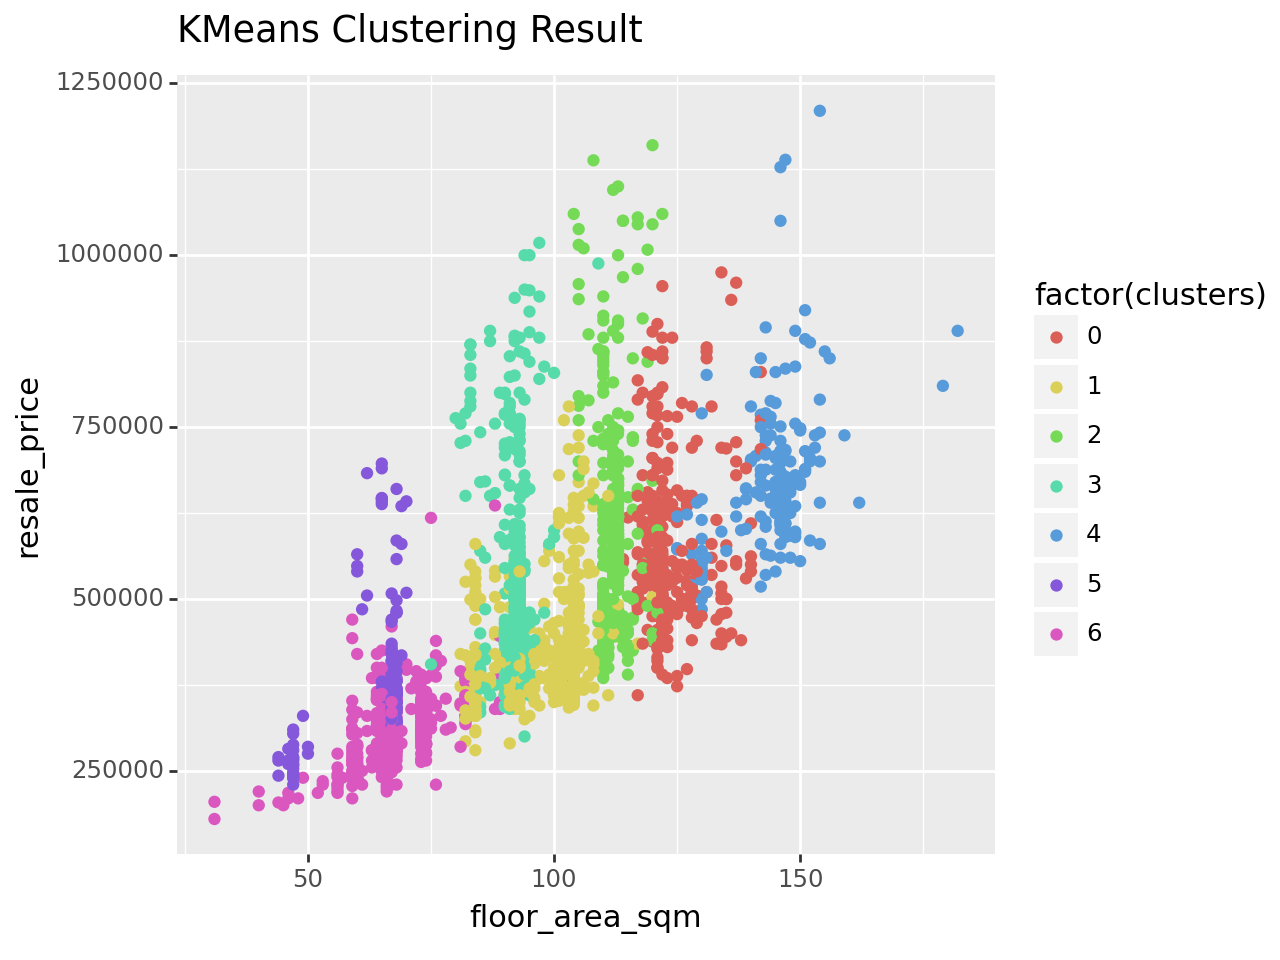

In [ ]:
print(ggplot(df, aes(x = "floor_area_sqm", y = "flat_type", color = "factor(clusters)" )) +
      geom_point() +
     labs(title = "KMeans Clustering Result"))
print(ggplot(df, aes(x = "floor_area_sqm", y = "resale_price", color = "factor(clusters)" )) +
      geom_point() +
     labs(title = "KMeans Clustering Result"))

In [ ]:
result = df.groupby('clusters')['resale_price'].agg(['max', 'min', 'mean']).reset_index()
question3_result=pd.DataFrame(result)
question3_result

,clusters,max,min,mean
0,0,975000.0,360000.0,577586.383562
1,1,780000.0,280000.0,432153.707143
2,2,1160000.0,385000.0,606761.804878
3,3,1018000.0,300000.0,526339.826087
4,4,1210000.0,485000.0,679676.067160
5,5,697000.0,230000.0,387584.593750
6,6,636000.0,180000.0,308412.954424


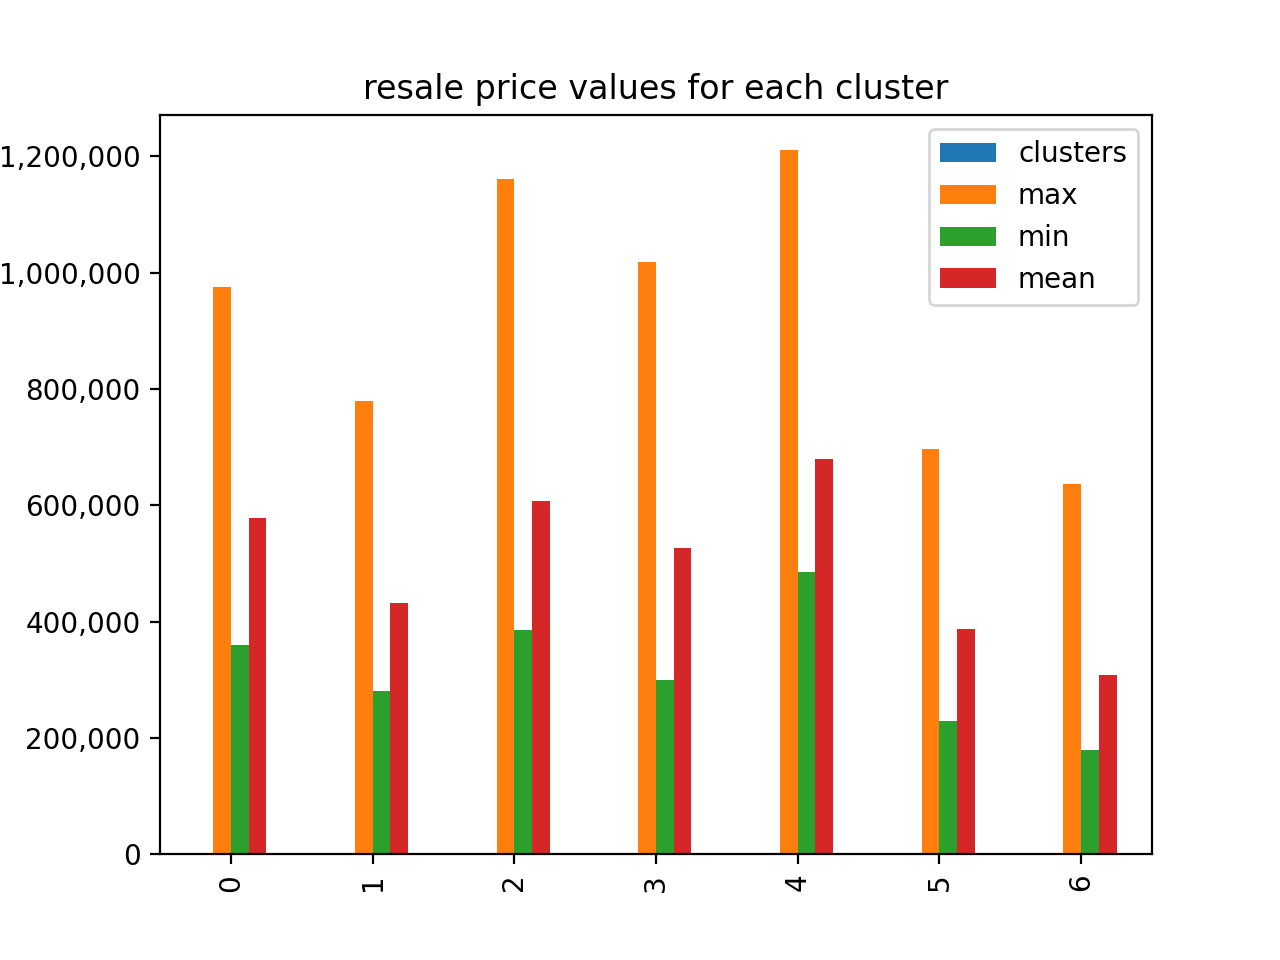

In [ ]:
question3_result.plot(kind='bar')
plt.title('resale price values for each cluster')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

<Figure size 1000x600 with 0 Axes>

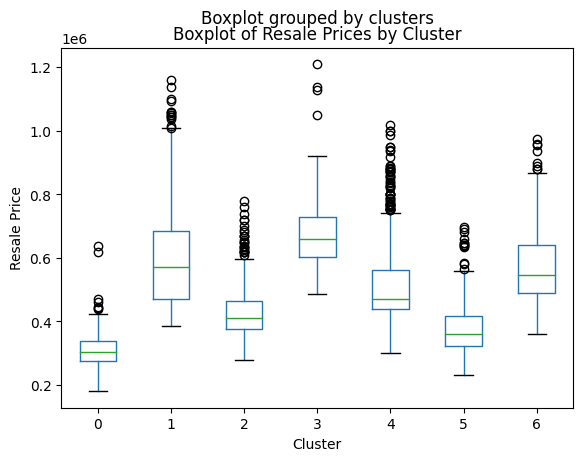

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='resale_price', by='clusters', grid=False)
plt.title('Boxplot of Resale Prices by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Resale Price')
plt.show()

# Q4. Is it better to use logistic regression or linear regression to estimate the resale price of each flat? What kind of metrics (ROC AUC score, precision, recall) should we look at to determine which models we should use for this project?

In [ ]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

### linear regression

In [ ]:
predictors=['town', 'flat_type',
       'block_ordinal', 'floor_area_sqm',
       'flat_model', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']

contin=['block_ordinal',  'floor_area_sqm', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']


X=df[predictors]
y=df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(handle_unknown='ignore'), ['town','flat_type','flat_model']),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", preprocess),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  2883935698.543909
Train MAE :  40895.46078090426
Train MAPE:  2883935698.543909
Train R2  :  0.8925261897732482
Test MSE  :  3181872870.003983
Test MAE  :  43918.45496933631
Test MAPE :  3181872870.003983
Test R2  :  0.8896135426259153


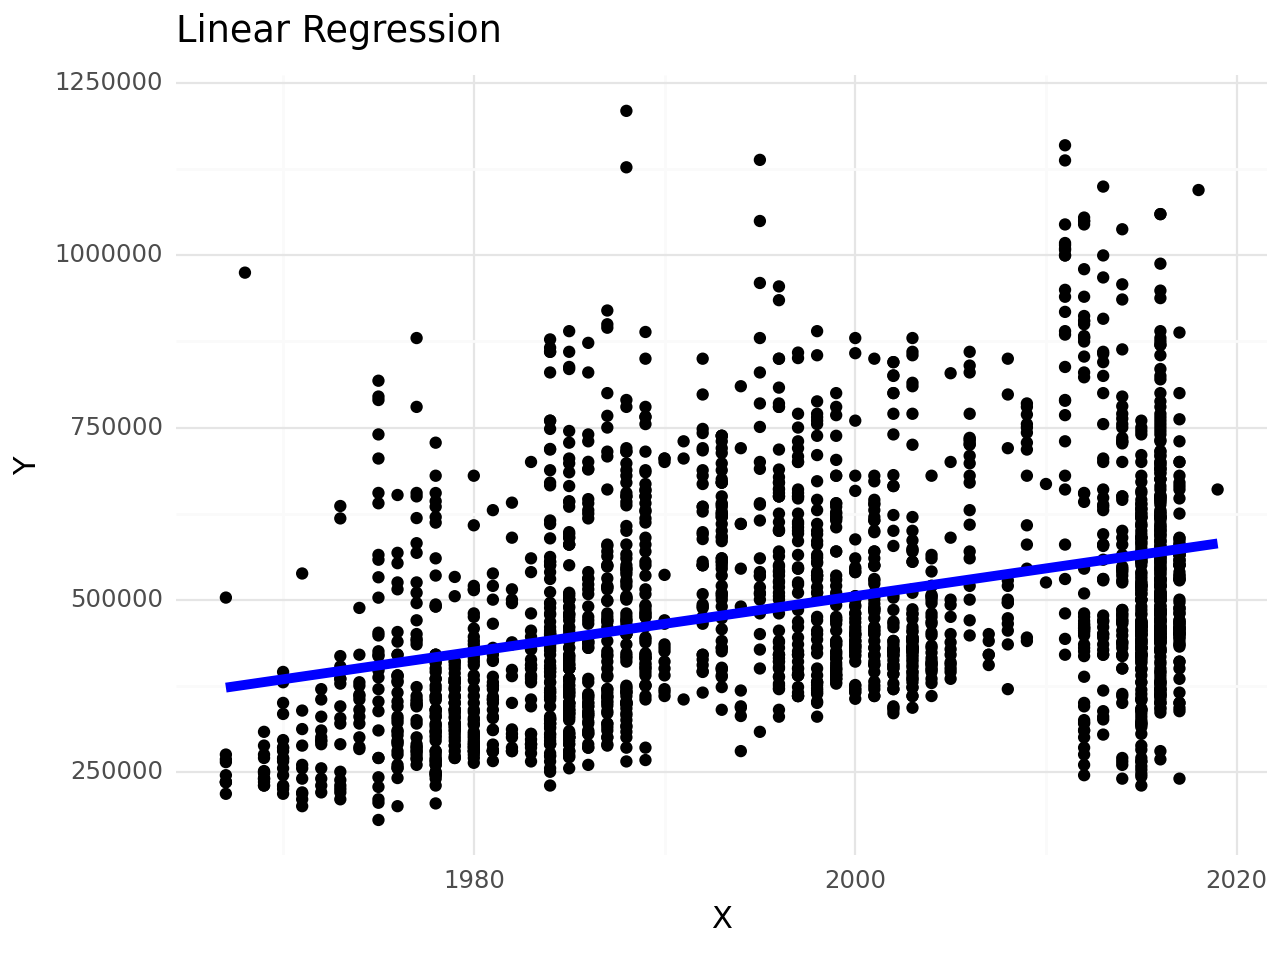

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df, aes(x = 'lease_commence_date', y = "resale_price")) + geom_point() +
 labs(x = "X", y = "Y", title = "Linear Regression") +
  geom_smooth(method = "lm", se = False, color = "blue", size = 2) +
  theme_minimal())

### polynomial regression d=2

In [ ]:
predictors=['town', 'flat_type',
       'block_ordinal', 'floor_area_sqm',
       'flat_model', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']

contin=['block_ordinal',  'floor_area_sqm', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']


X=df[predictors]
y=df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(handle_unknown='ignore'), ['town','flat_type','flat_model']),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", preprocess),
                 ("poly", PolynomialFeatures(degree = 2)),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  1084437449.6781583
Train MAE :  23223.08748850786
Train MAPE:  1084437449.6781583
Train R2  :  0.960418208763352
Test MSE  :  4638332508.270792
Test MAE  :  37601.43505235275
Test MAPE :  4638332508.270792
Test R2  :  0.8260419928444621


### polynomial regression d=3

In [ ]:
predictors=['town', 'flat_type',
       'block_ordinal', 'floor_area_sqm',
       'flat_model', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']

contin=['block_ordinal',  'floor_area_sqm', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']


X=df[predictors]
y=df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(handle_unknown='ignore'), ['town','flat_type','flat_model']),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", preprocess),
                 ("poly", PolynomialFeatures(degree = 3)),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  217364051.76330256
Train MAE :  8574.987391131433
Train MAPE:  217364051.76330256
Train R2  :  0.9919650755253527
Test MSE  :  238601061513.1533
Test MAE  :  189426.54980880325
Test MAPE :  238601061513.1533
Test R2  :  -7.523022758641005


### polynomial regression d=3, without 'town' variable

In [ ]:
predictors=[ 'flat_type',
       'block_ordinal', 'floor_area_sqm',
       'flat_model', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']


contin=['block_ordinal',  'floor_area_sqm', 'lease_commence_date',
       'storey_min', 'storey_max', 'remaining_lease_year']


X=df[predictors]
y=df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(handle_unknown='ignore'), ['flat_type','flat_model']),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("pre", preprocess),
                ("poly", PolynomialFeatures(degree = 3)),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2  : ", r2_score(y_test,y_pred_test))

Train MSE :  4051959848.000549
Train MAE :  44239.32381685367
Train MAPE:  4051959848.000549
Train R2  :  0.8536521095240676
Test MSE  :  7792875539.453923
Test MAE  :  59129.54570522705
Test MAPE :  7792875539.453923
Test R2  :  0.6946184511300604


### result graph

In [ ]:
degrees = [1, 2, 3]
Train_R2  = [0.8925261897732482,0.960418208763352,0.9919650755253527]
Test_MSE  =  [3181872870.003983,4638332508.270792,238601061513.1533]
Test_MAE  =  [43918.45496933631,37601.43505235275,189426.54980880325]
Test_MAPE =  [3181872870.003983,4638332508.270792,238601061513.1533]
Test_R2  = [0.8896135426259153,0.8260419928444621,-7.523022758641005]

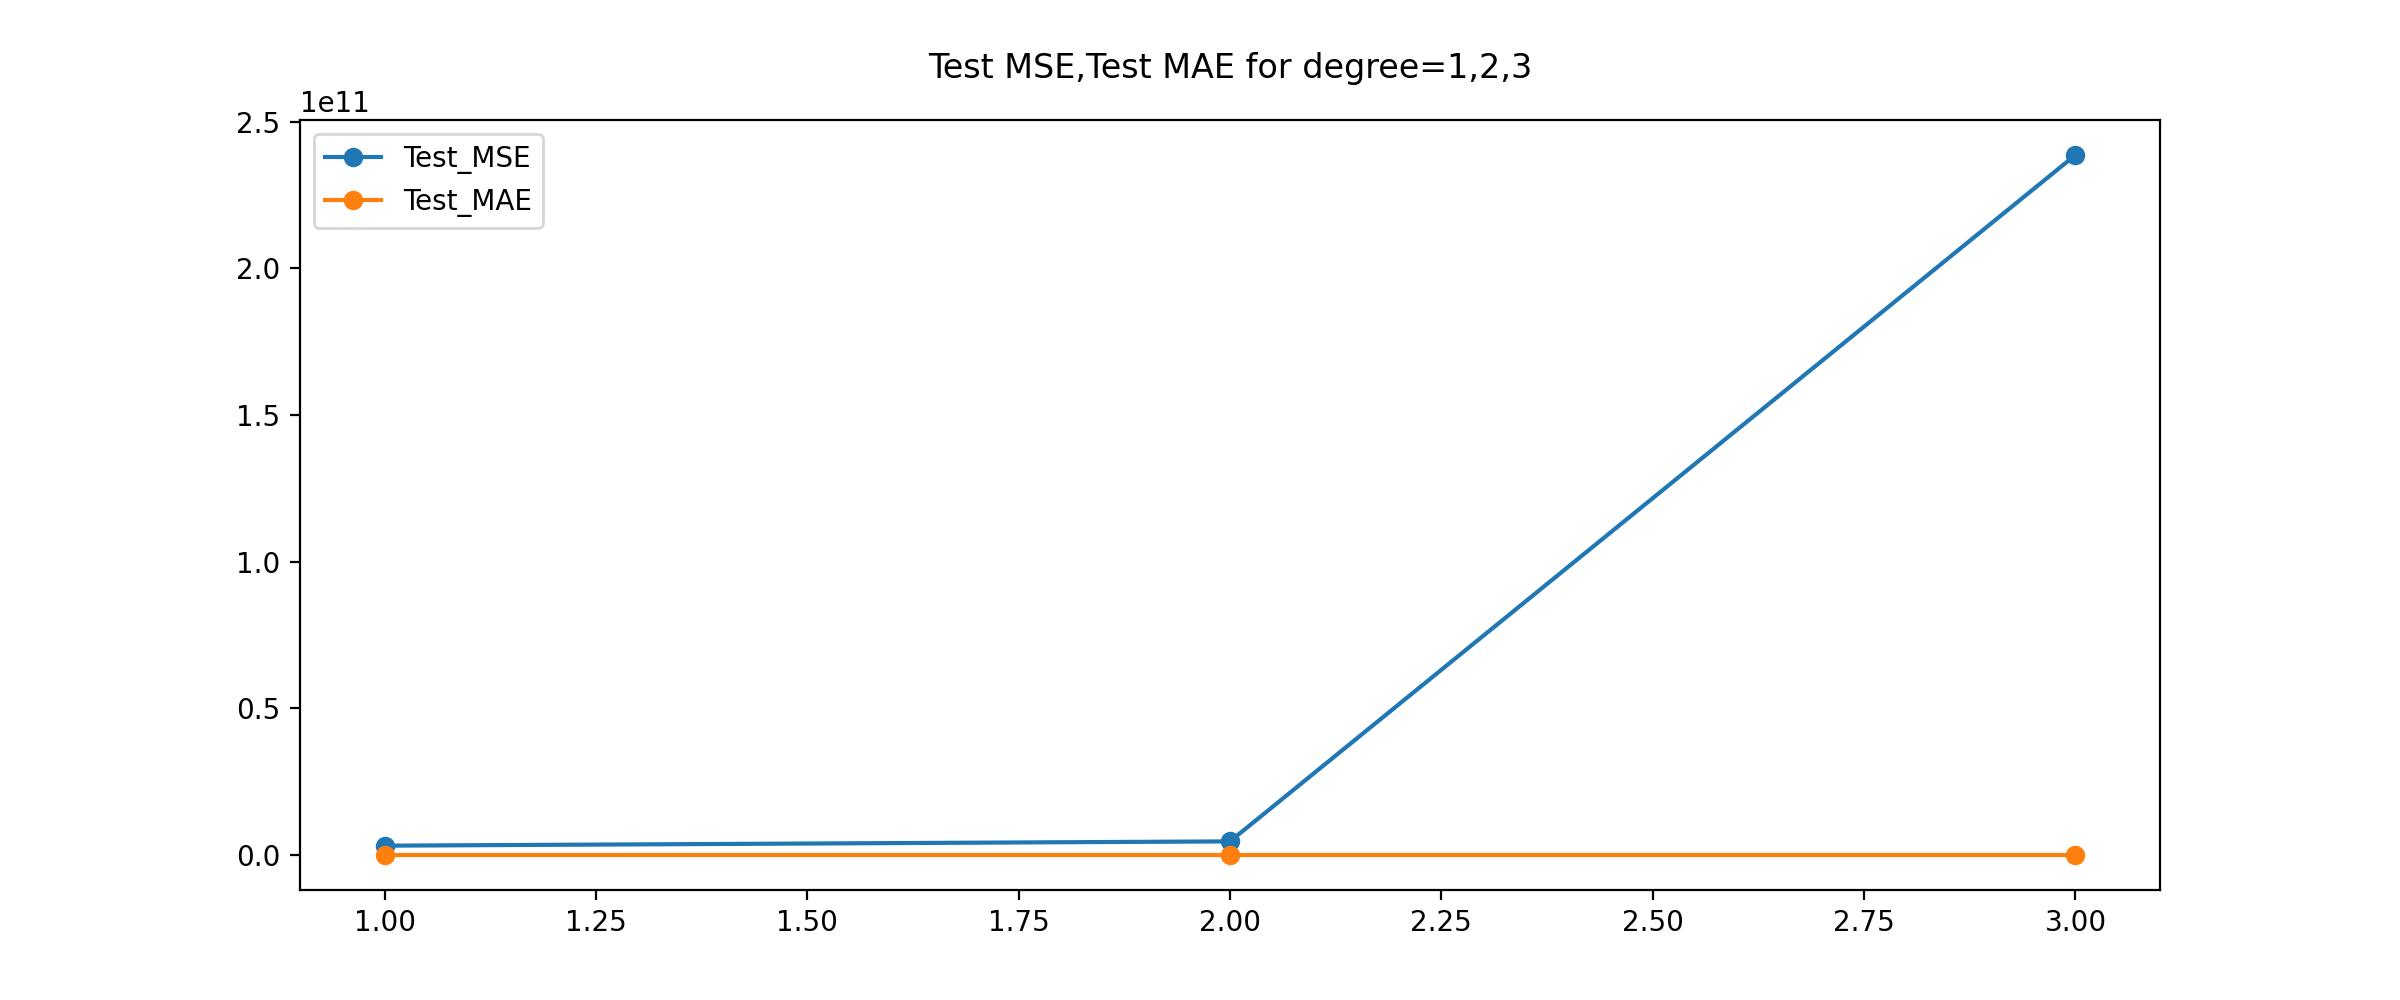

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(degrees,Test_MSE,label='Test_MSE',marker='o')

plt.plot(degrees,Test_MAE,label='Test_MAE',marker='o')

plt.title('Test MSE,Test MAE for degree=1,2,3', pad=15)

plt.legend()

plt.show()

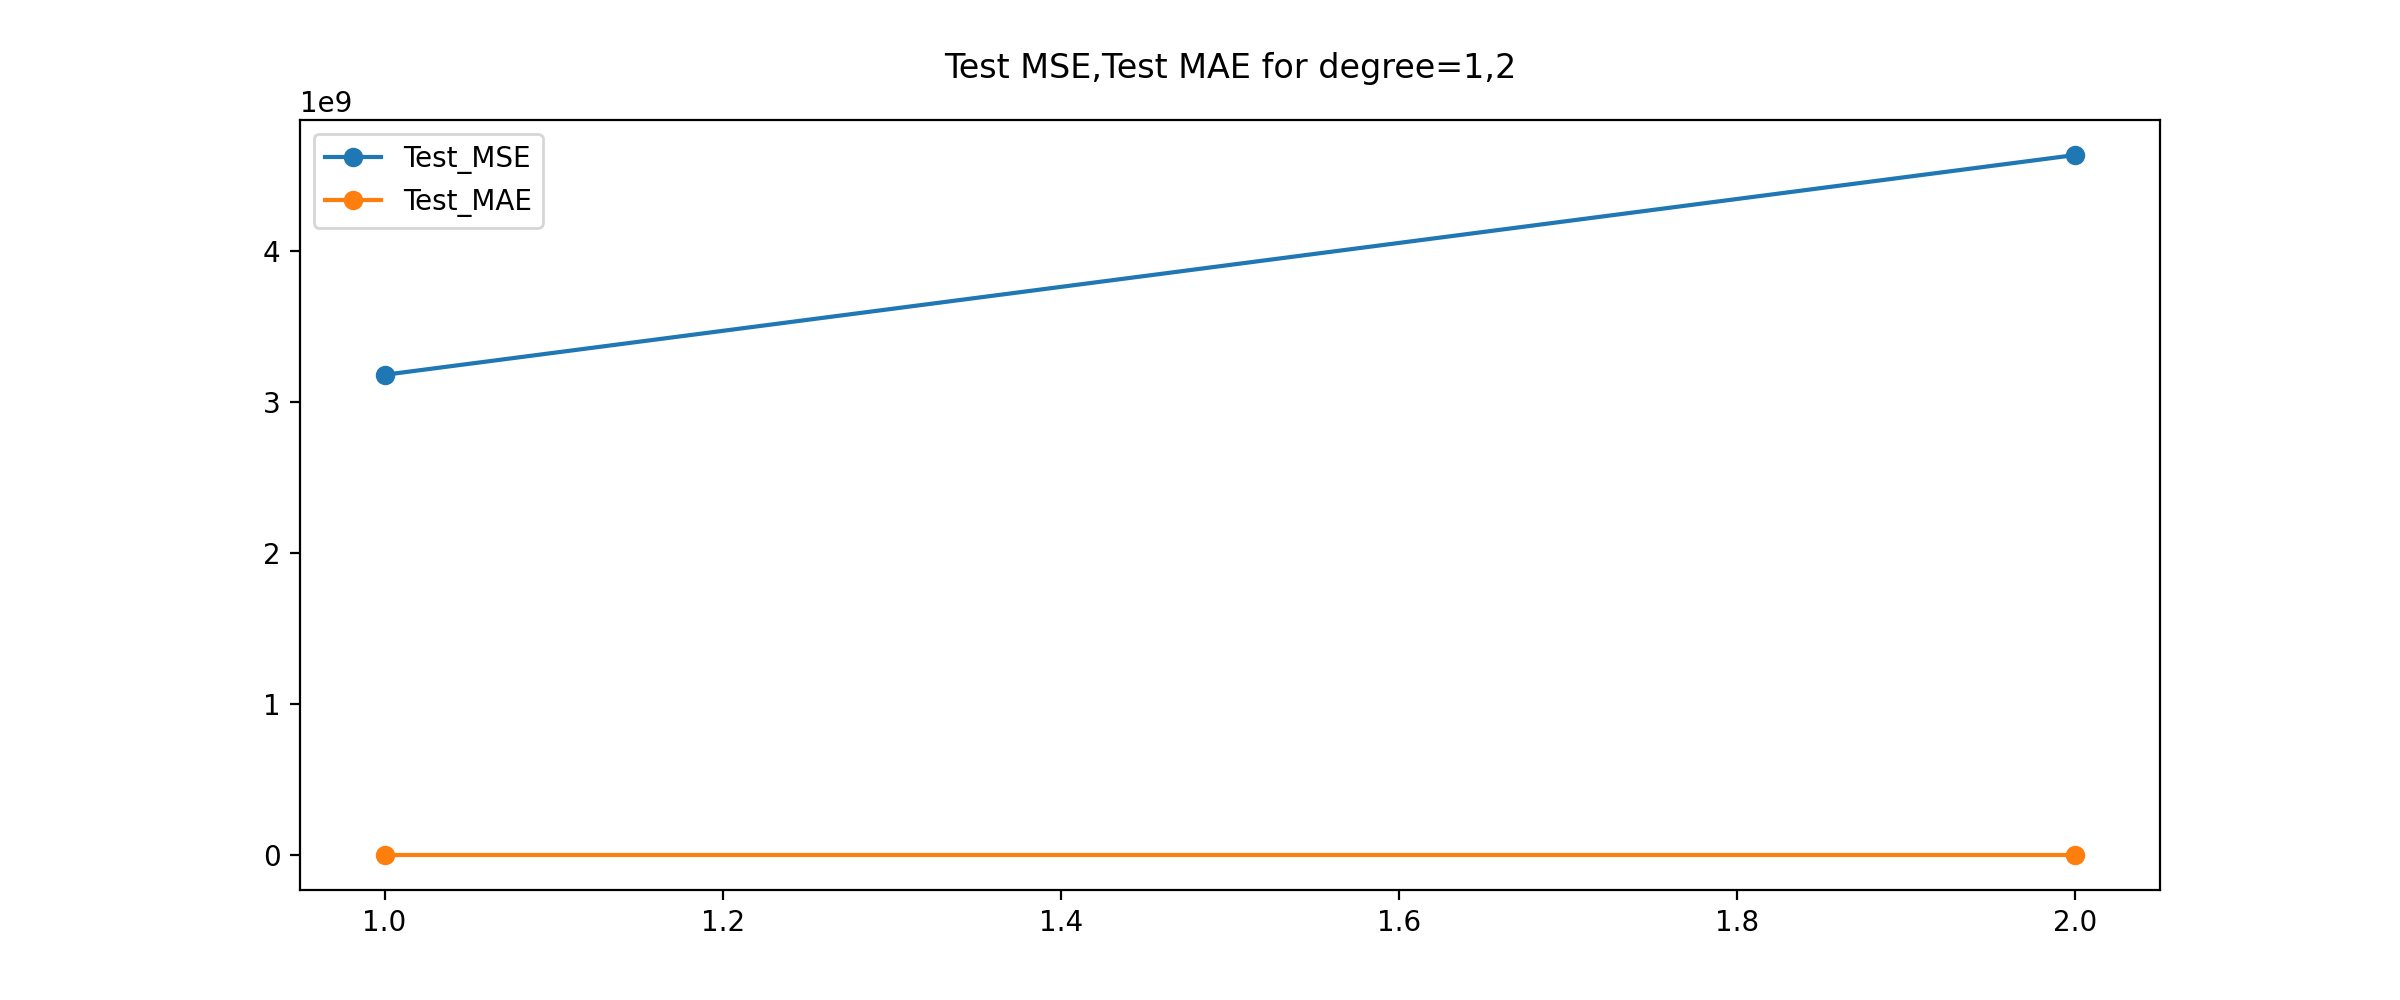

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(degrees[:2],Test_MSE[:2],label='Test_MSE',marker='o')

plt.plot(degrees[:2],Test_MAE[:2],label='Test_MAE',marker='o')

plt.title('Test MSE,Test MAE for degree=1,2', pad=15)

plt.legend()

plt.show()

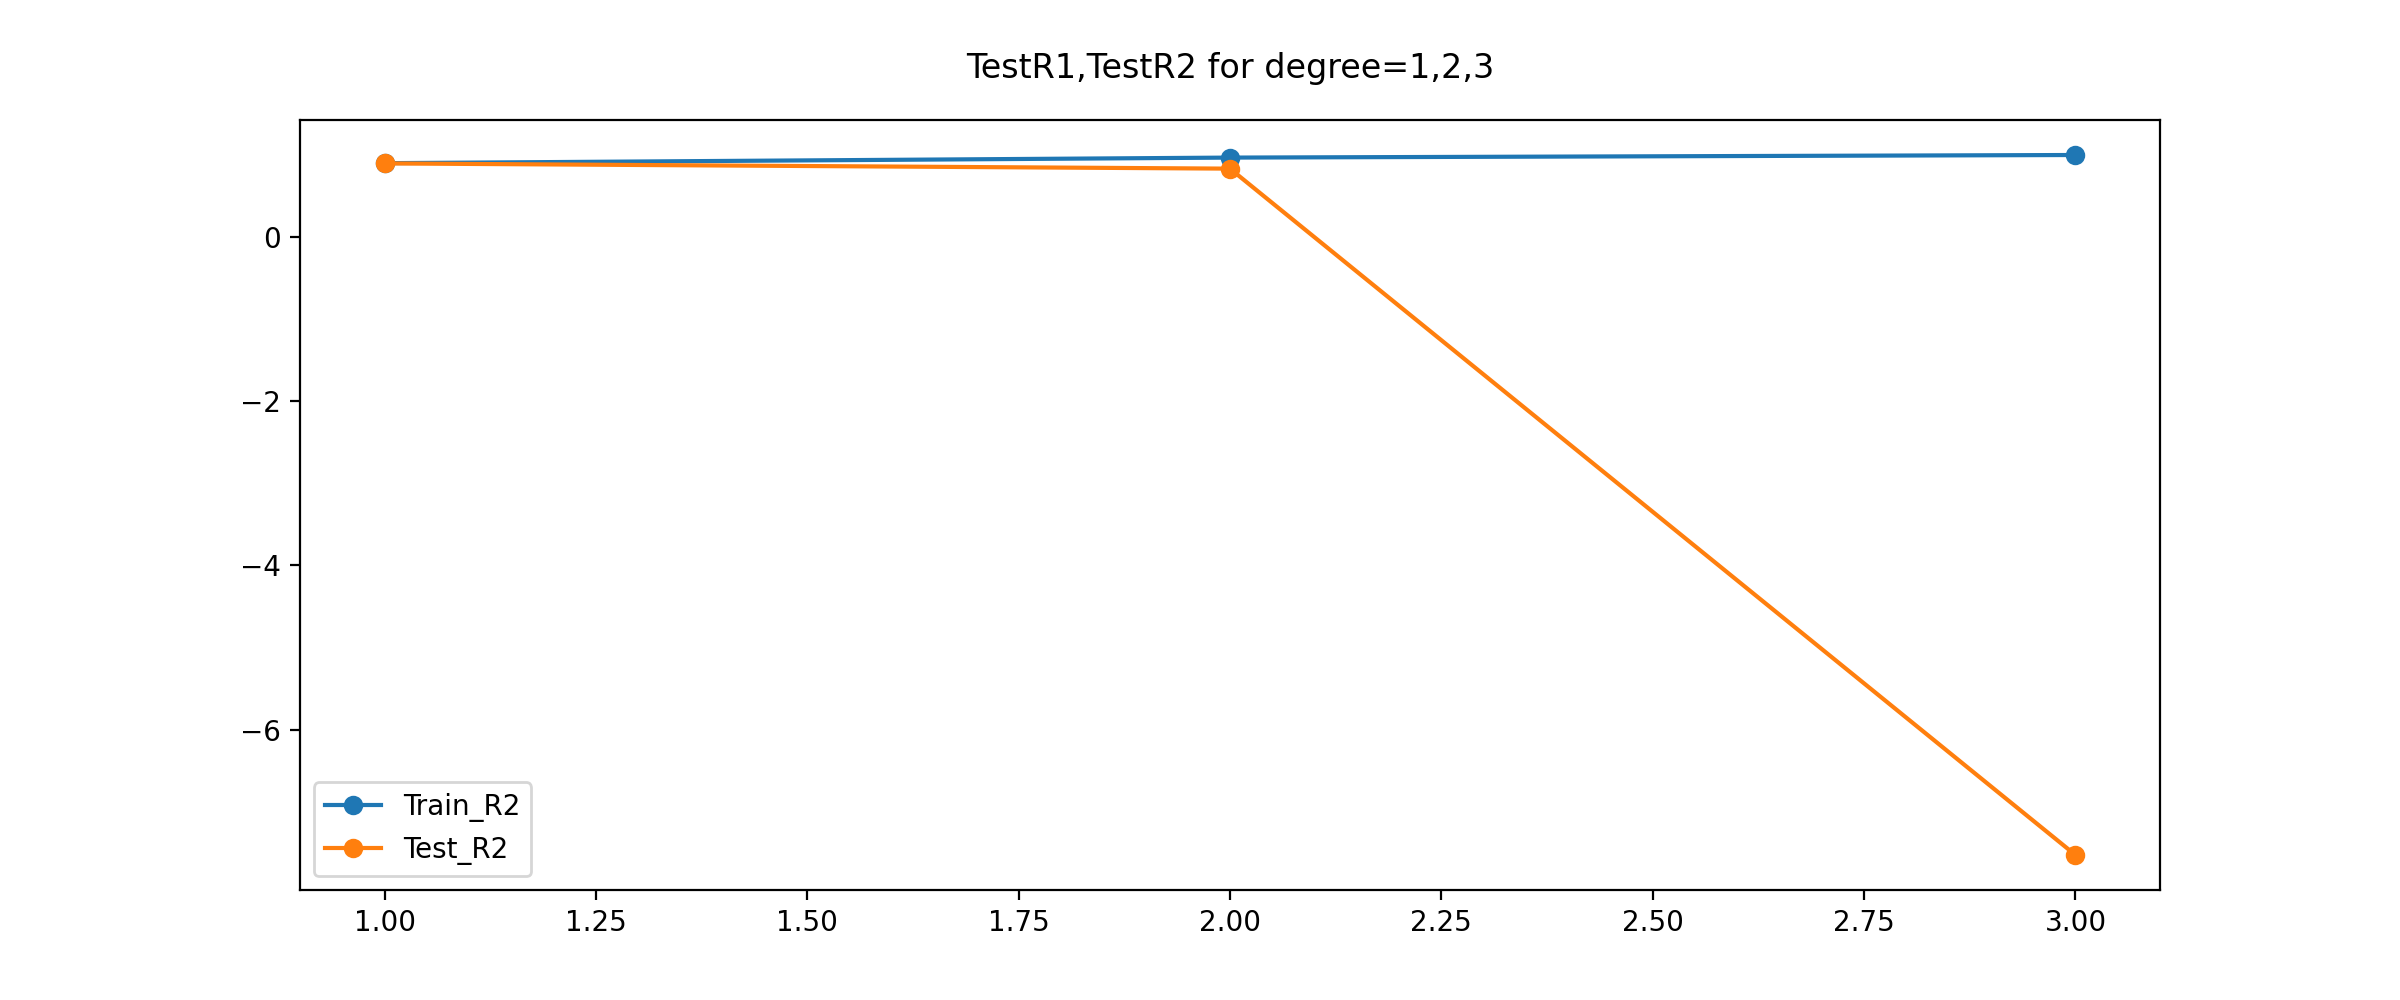

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(degrees,Train_R2,label='Train_R2',marker='o')

plt.plot(degrees,Test_R2,label='Test_R2',marker='o')

plt.title('TestR1,TestR2 for degree=1,2,3', pad=15)

plt.legend()

plt.show()

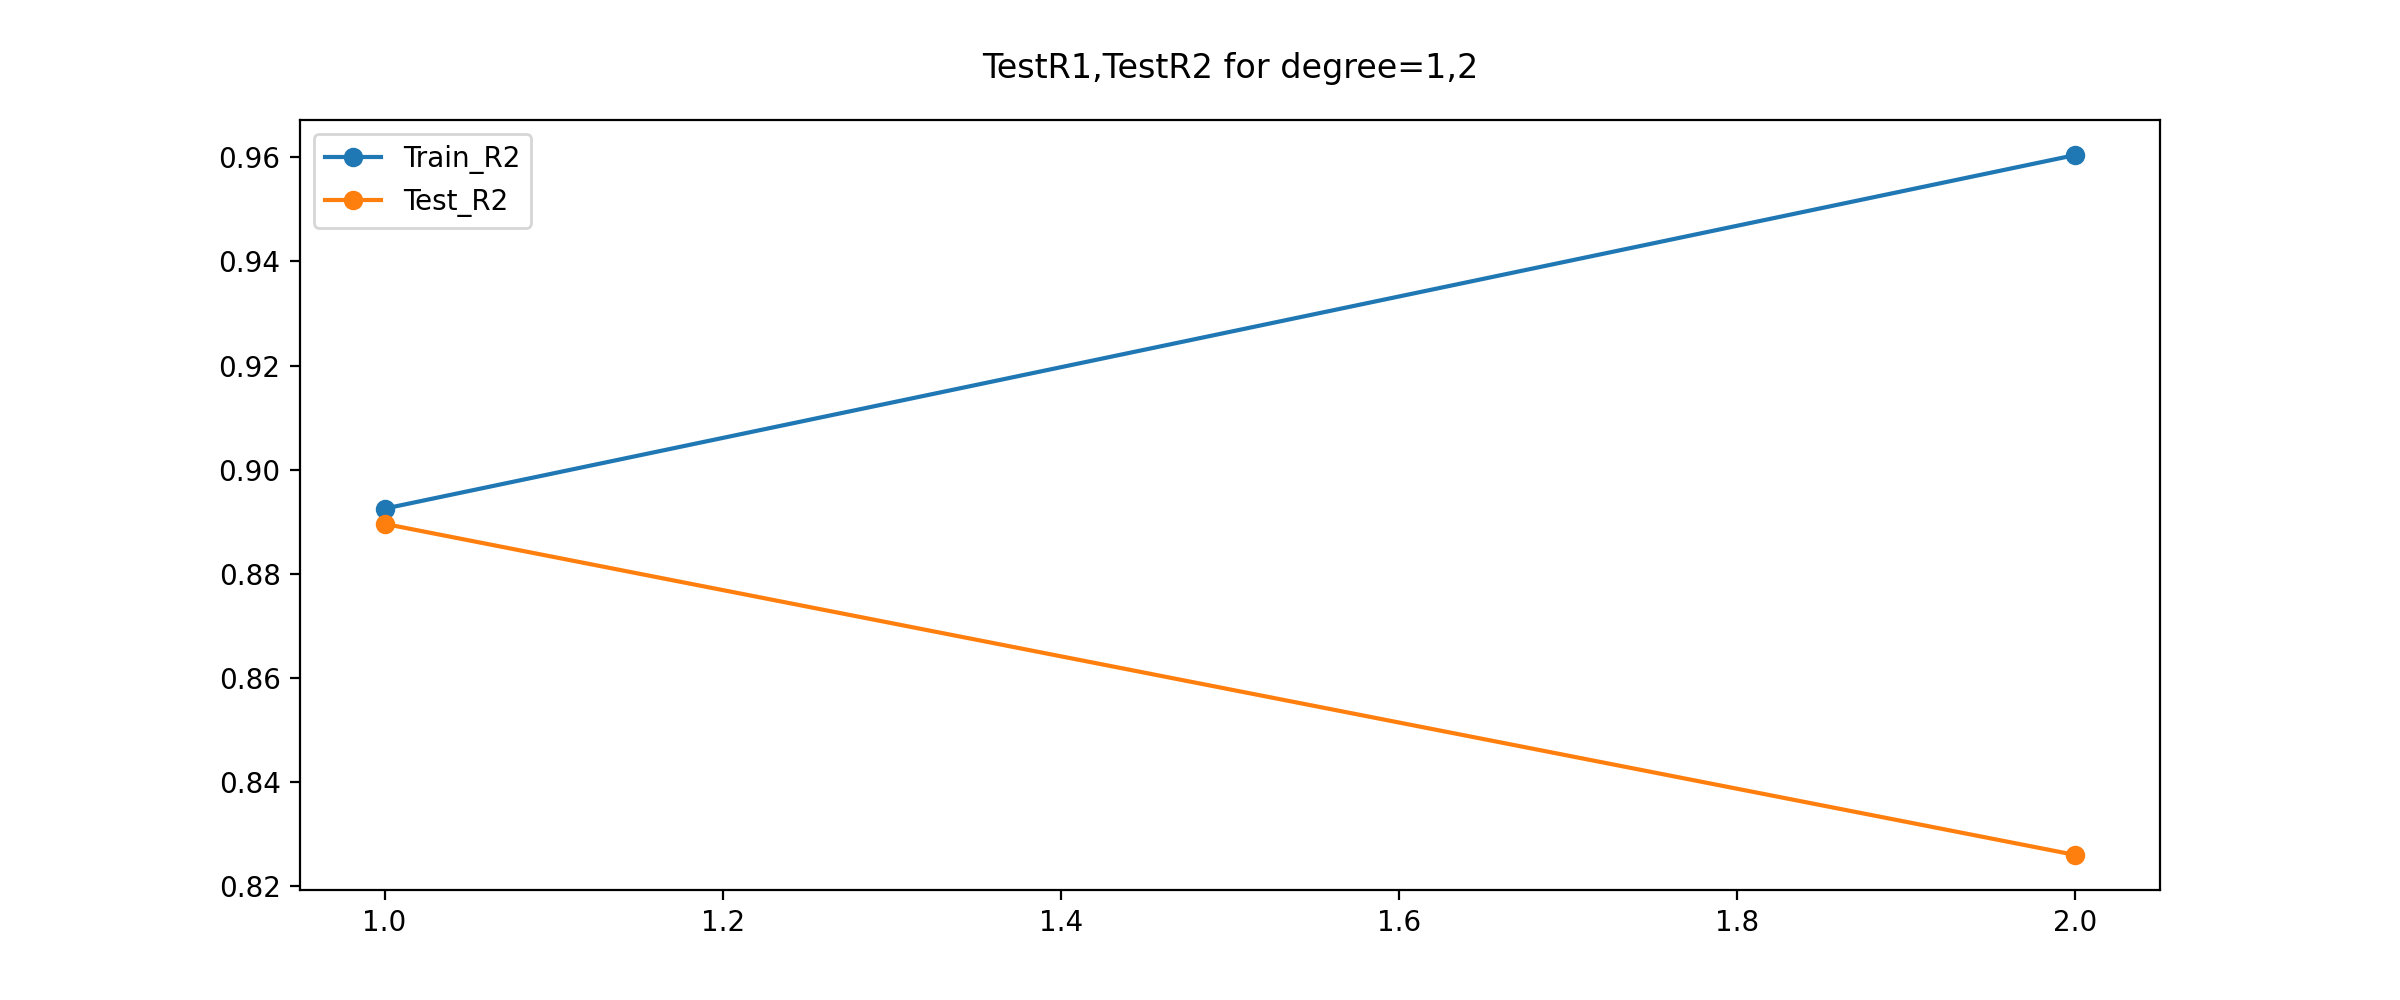

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(degrees[:2],Train_R2[:2],label='Train_R2',marker='o')

plt.plot(degrees[:2],Test_R2[:2],label='Test_R2',marker='o')

plt.title('TestR1,TestR2 for degree=1,2', pad=15)

plt.legend()

plt.show()

# Q5. How does resale price compare across different housing models within the same town and similar flat types? What statistical method would be best to estimate this?


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
import pandas as pd
import numpy as np
from plotnine import *
from plotnine import ggplot, aes, geom_bar, labs, facet_wrap, theme_minimal, theme_bw, scale_fill_brewer, geom_boxplot, theme
import statsmodels.api as sm
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import f_oneway

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


%matplotlib inline
df = pd.read_csv("/content/Flat prices.csv")

df.head()

df.isnull().sum()
df.dropna(inplace = True)
df.reset_index(inplace = True)

# preprocessing for the 'storey_range' columns
# 'storey_range' columns were separated into min and max values of int type.
df[['storey_min', 'storey_max']] = df['storey_range'].str.split(' TO ', expand=True)
df['storey_min'] = df['storey_min'].astype(int)
df['storey_max'] = df['storey_max'].astype(int)


# preprocessing for the 'remaining_lease' columns
# We'll use only the year value.
df['remaining_lease_year'] = df['remaining_lease'].str[:2]
df['remaining_lease_year'] = df['remaining_lease_year'].astype(int)


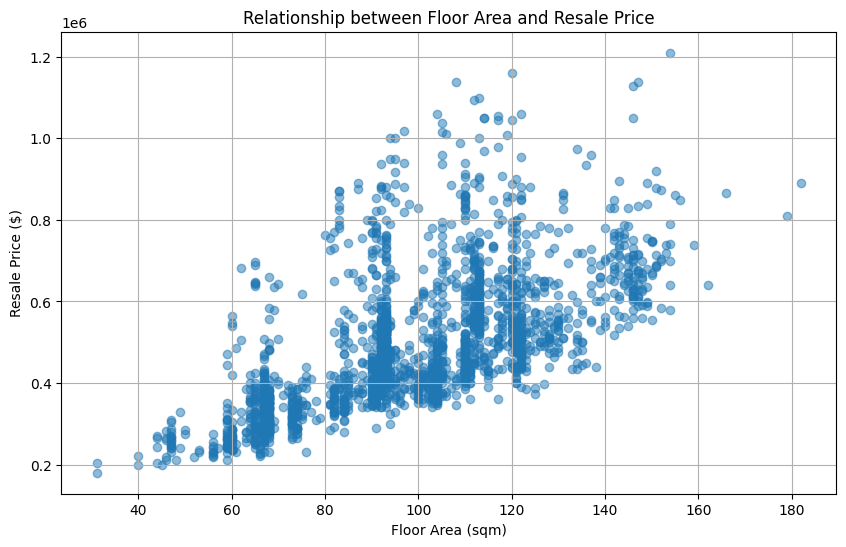

In [ ]:
df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'], errors='coerce')
df['resale_price'] = pd.to_numeric(df['resale_price'], errors='coerce')

# Remove any rows with NaN values in these columns
df.dropna(subset=['floor_area_sqm', 'resale_price'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['floor_area_sqm'], df['resale_price'], alpha=0.5)
plt.title('Relationship between Floor Area and Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price ($)')
plt.grid(True)
plt.show()

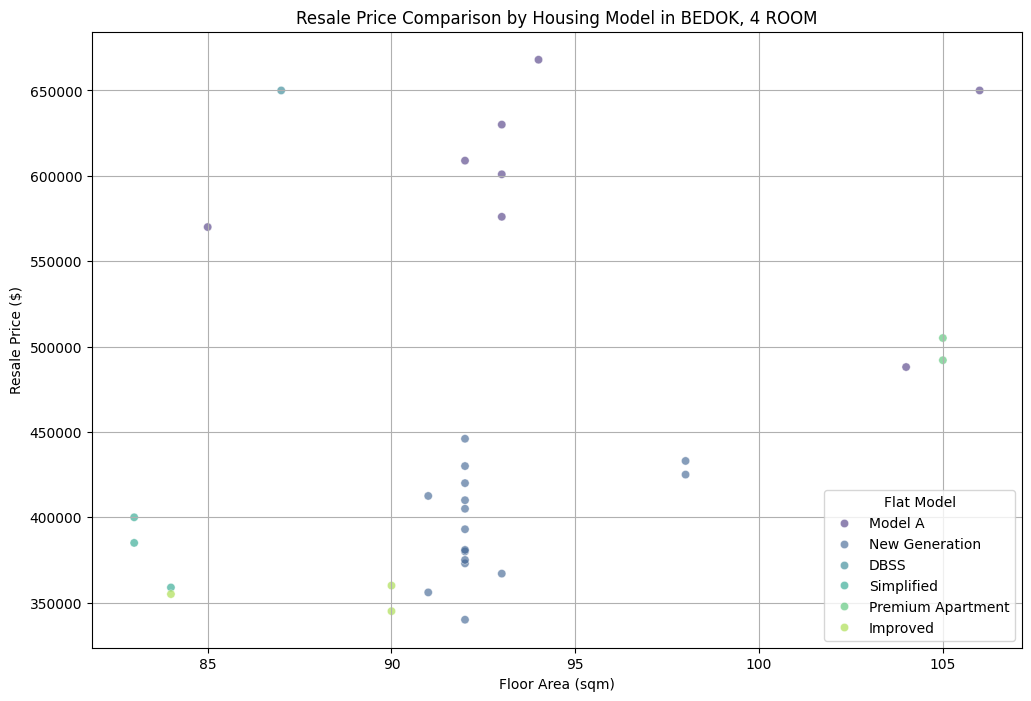

In [ ]:
import seaborn as sns



# Data Cleaning
df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'], errors='coerce')
df['resale_price'] = pd.to_numeric(df['resale_price'], errors='coerce')
df.dropna(subset=['floor_area_sqm', 'resale_price', 'flat_model'], inplace=True)

# Filter data for a specific town and flat type
town_of_interest = 'BEDOK'  # Specify your town of interest
flat_type_of_interest = '4 ROOM'  # Specify your flat type of interest
filtered_df = df[(df['town'] == town_of_interest) & (df['flat_type'] == flat_type_of_interest)]

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='floor_area_sqm', y='resale_price', hue='flat_model', palette='viridis', alpha=0.6)
plt.title(f'Resale Price Comparison by Housing Model in {town_of_interest}, {flat_type_of_interest}')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price ($)')
plt.grid(True)
plt.legend(title='Flat Model')
plt.show()

# Q6. Can we use a Gaussian Mixture Model to find out what types of homes are most common in different areas?



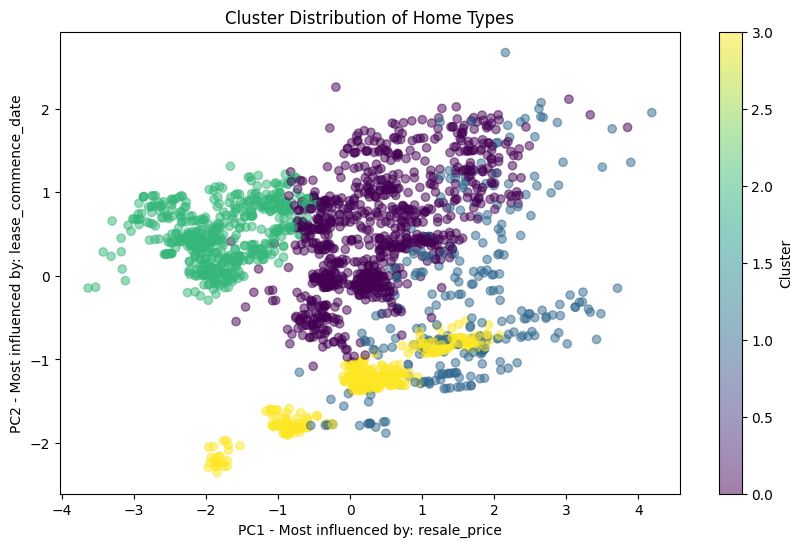

In [ ]:
features = ['floor_area_sqm', 'lease_commence_date', 'resale_price']
df.dropna(subset=features, inplace=True)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')  # Convert to numeric if not already
df.dropna(inplace=True)  # Remove any rows with NaN values after conversion

# Data scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0)  # Tune n_components based on your dataset
gmm.fit(scaled_features)

# Assign clusters
df['Cluster'] = gmm.predict(scaled_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Analyzing PCA loadings to understand the contribution of each variable to the components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster Distribution of Home Types')
plt.xlabel('PC1 - Most influenced by: ' + loadings.abs().nlargest(1, 'PC1').index[0])
plt.ylabel('PC2 - Most influenced by: ' + loadings.abs().nlargest(1, 'PC2').index[0])
plt.colorbar(label='Cluster')
plt.show()

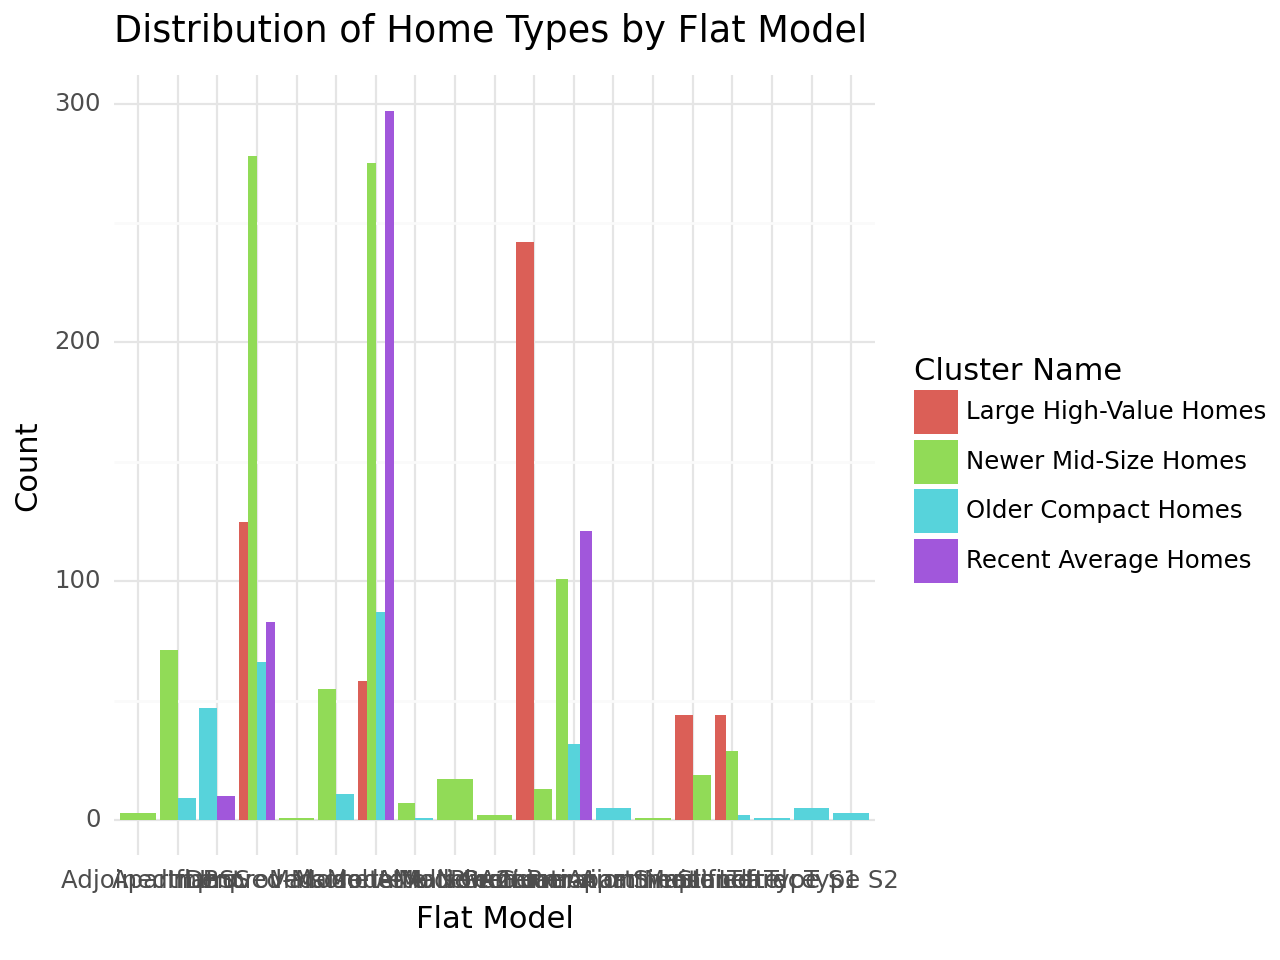

In [ ]:
features = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'flat_model']
df.dropna(subset=features, inplace=True)
df[features[:-1]] = df[features[:-1]].apply(pd.to_numeric, errors='coerce')  # Ensure numeric types
df.dropna(inplace=True)  # Clean data

# Data scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features[:-1]])

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0)  # Adjust n_components based on your criteria
gmm.fit(scaled_features)

# Assign clusters
df['Cluster'] = gmm.predict(scaled_features)

# Naming clusters based on hypothetical characteristics
cluster_names = {
    0: "Newer Mid-Size Homes",
    1: "Older Compact Homes",
    2: "Large High-Value Homes",
    3: "Recent Average Homes"
}
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Aggregate data for visualization
df_summary = df.groupby(['flat_model', 'Cluster Name']).size().reset_index(name='Count')

# Plotting using plotnine
plot = (ggplot(df_summary, aes(x='flat_model', y='Count', fill='Cluster Name')) +
        geom_bar(stat='identity', position='dodge') +
        labs(x='Flat Model', y='Count', title='Distribution of Home Types by Flat Model') +
        theme_minimal())

# Display the plot
print(plot)